HeartDiseaseorAttack - Binary

HighBP - Binary

HighChol - Binary

BMI - Conitnous  12 to 98

Smoker - binary

Diabetes - 0, 1, 2

PhysActivity - binary

Fruits - binary

Veggies - binary

HvyAlcoholConsump - binary

MentHlth - 0 to 30 [Removed 0s, without disturbing the proportions]

PhysHlth - 0 to 30 [Removed 0s, without disturbing the proportions]

Sex - 0 - female, 1 - male

Age- ['18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13 ]

Education -  0 to 6

Income - 0 to 8


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegressionCV
import random
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [2]:
#import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science projects /Capstone Heart disease/HeartDisease.csv')
df

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,45.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,23.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

In [9]:
convert_to_int = ['HeartDiseaseorAttack','HighBP', 'HighChol', 'BMI','Smoker','Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump','MentHlth','PhysHlth' ,'Sex', 'Age', 'Education', 'Income']
for i in convert_to_int:
  df[i] = df[i].astype('int64')

In [10]:
round(df.describe(), 3)

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000,253680.000
mean,0.094,0.429,0.424,28.382,0.443,0.297,0.757,0.634,0.811,0.056,3.185,4.242,0.440,8.032,5.050,6.054
std,0.292,0.495,0.494,6.609,0.497,0.698,0.429,0.482,0.391,0.230,7.413,8.718,0.496,3.054,0.986,2.071
min,0.000,0.000,0.000,12.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,0.000,0.000,0.000,24.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,6.000,4.000,5.000
50%,0.000,0.000,0.000,27.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,8.000,5.000,7.000
75%,0.000,1.000,1.000,31.000,1.000,0.000,1.000,1.000,1.000,0.000,2.000,3.000,1.000,10.000,6.000,8.000
max,1.000,1.000,1.000,98.000,1.000,2.000,1.000,1.000,1.000,1.000,30.000,30.000,1.000,13.000,6.000,8.000


#EDA

also removing outliers

In [11]:
#check proportion of Heartdiseases on Income Level

income_counts = df['Income'].value_counts()
HD_income_counts = df[df['HeartDiseaseorAttack']== 1]['Income'].value_counts()
percentage_HD = (HD_income_counts / income_counts) * 100
print(f'Proportions of H.Diseases with Income levels, {percentage_HD} ')

Proportions of H.Diseases with Income levels, Income
1    15.829171
2    18.645506
3    15.749656
4    14.045195
5    12.212649
6     9.997258
7     7.876166
8     5.072744
Name: count, dtype: float64 


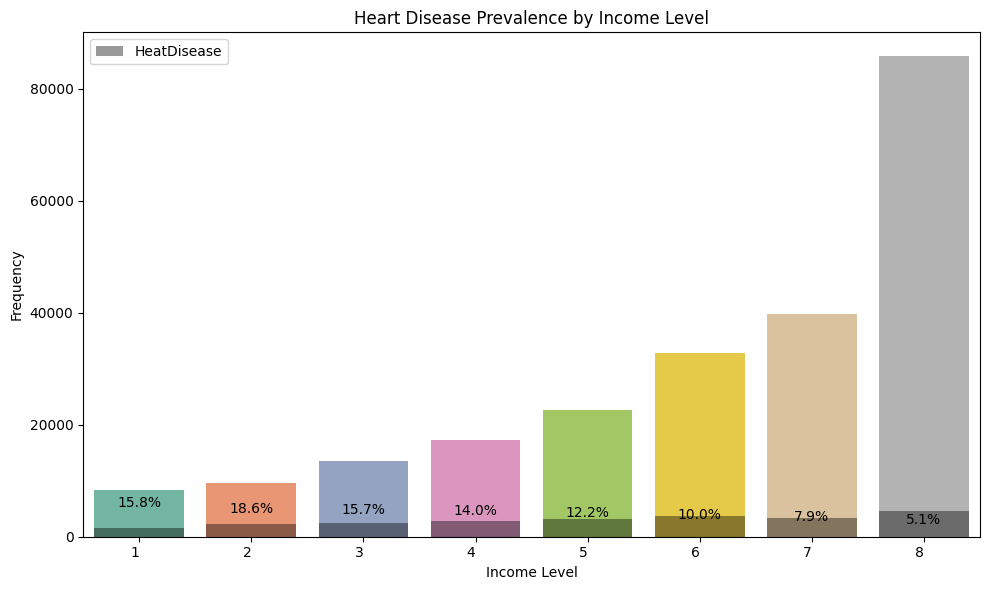

In [12]:
HD_income_counts = df[df['HeartDiseaseorAttack']== 1]['Income'].value_counts()
NoHD_income_counts = df[df['HeartDiseaseorAttack']== 0]['Income'].value_counts()
income_counts = df['Income'].value_counts()
percentage_HD = (HD_income_counts / income_counts) * 100


plt.figure(figsize=(10, 6))

sns.countplot(x = 'Income', data = df[df['HeartDiseaseorAttack'] == 0], palette = 'Set2')
sns.countplot(x = 'Income', data =  df[df['HeartDiseaseorAttack'] == 1], color = 'Black', alpha = 0.4, label = 'HeatDisease')

plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.title('Heart Disease Prevalence by Income Level')
plt.legend()

# Add percentage labels on top of each bar
for i, income_level in enumerate(percentage_HD.index):
    plt.text(i, HD_income_counts.iloc[i] + 100, f'{percentage_HD.iloc[i]:.1f}%', ha='center', va='bottom')

plt.xticks(ha='right')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [13]:
for i, income_level in enumerate(percentage_HD.index):
  print(i, income_level)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8


In [14]:
#check proportion of having and not having a HeartDiseaseorAttack for each education level
education_counts = df['Education'].value_counts()
HD_education_counts = df[df['HeartDiseaseorAttack']== 1]['Education'].value_counts()
percentage_HD = (HD_education_counts / education_counts) * 100
print(f'Proportions of H.Diseases with Education levels, {percentage_HD} ')

Proportions of H.Diseases with Education levels, Education
1    16.666667
2    19.243136
3    17.071112
4    11.899602
5     9.895580
6     6.599581
Name: count, dtype: float64 


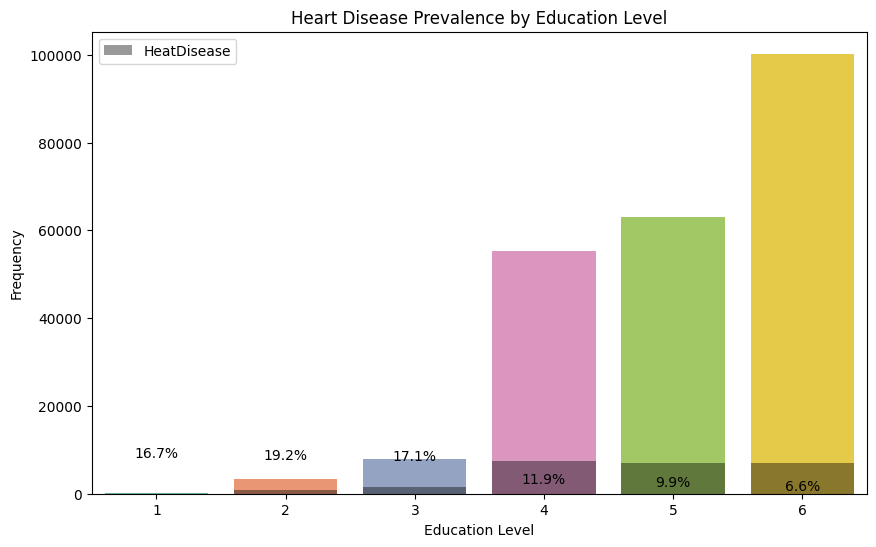

In [15]:
HD_education_counts = df[df['HeartDiseaseorAttack'] == 1]['Education'].value_counts()
NoHD_education_counts = df[df['HeartDiseaseorAttack'] == 0]['Education'].value_counts()
education_counts = df['Education'].value_counts()
percentage_HD = (HD_education_counts / education_counts) * 100


plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

sns.countplot(x = 'Education', data = df[df['HeartDiseaseorAttack'] == 0], palette = 'Set2')
sns.countplot(x = 'Education', data =  df[df['HeartDiseaseorAttack'] == 1], color = 'Black', alpha = 0.4, label = 'HeatDisease')

plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Heart Disease Prevalence by Education Level')
plt.legend()

# Add percentage labels on top of each bar
for i, edu_level in enumerate(percentage_HD.index):
    plt.text(i, HD_education_counts.iloc[i] + 100, f'{percentage_HD.iloc[i]:.1f}%', ha='center', va='bottom')

plt.show()

In [16]:
for i, edu_level in enumerate(percentage_HD.index):
  print(i, edu_level)

0 1
1 2
2 3
3 4
4 5
5 6


In [17]:
#check proportion of having and not having a HeartDiseaseorAttack for eating fruits or not
fruit_counts = df['Fruits'].value_counts()
HD_fruits_counts = df[df['HeartDiseaseorAttack']== 1]['Fruits'].value_counts()
percentage_HD = (HD_fruits_counts / fruit_counts) * 100
print(f'Proportions of H.Diseases with Eating fruits or not, \n {percentage_HD} ')

Proportions of H.Diseases with Eating fruits or not, 
 Fruits
1     8.979602
0    10.179776
Name: count, dtype: float64 


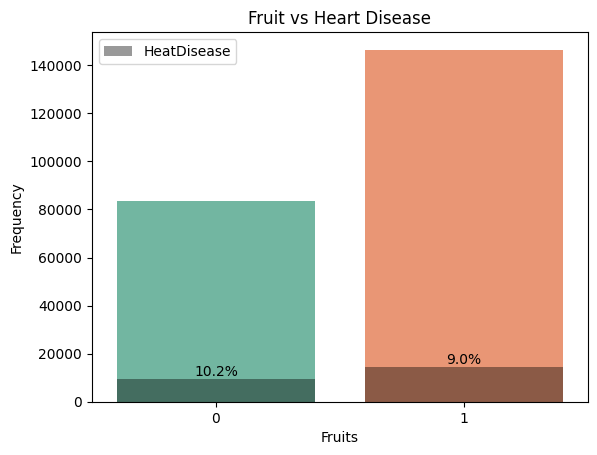

In [18]:
HD_fruits_counts = df[df['HeartDiseaseorAttack']== 1]['Fruits'].value_counts()
fruit_counts = df['Fruits'].value_counts()
percentage_HD = (HD_fruits_counts / fruit_counts) * 100

NoHD_fruits_counts = df[df['HeartDiseaseorAttack']== 0]['Fruits'].value_counts()


sns.countplot(x = 'Fruits', data  = df[df['HeartDiseaseorAttack']==0], palette = 'Set2')
sns.countplot(x = 'Fruits', data =  df[df['HeartDiseaseorAttack'] == 1], color = 'Black', alpha = 0.4, label = 'HeatDisease')

plt.title('Fruit vs Heart Disease')
plt.xlabel('Fruits')
plt.ylabel('Frequency')
plt.legend()


# Add percentage labels on top of each bar
for i, fruits in enumerate(percentage_HD.index):
    plt.text(fruits, HD_fruits_counts.loc[fruits] + 10, f'{percentage_HD.loc[fruits]:.1f}%', ha='center', va='bottom')



plt.show()

In [19]:
#check proportion of having and not having a HeartDiseaseorAttack for eating Veggies or not
veggies_counts = df['Veggies'].value_counts()
HD_veggies_counts = df[df['HeartDiseaseorAttack']== 1]['Veggies'].value_counts()
percentage_HD = (HD_veggies_counts / veggies_counts) * 100
print(f'Proportions of H.Diseases with Eating Veggies or not, \n {percentage_HD} ')

Proportions of H.Diseases with Eating Veggies or not, 
 Veggies
1     8.867038
0    11.791634
Name: count, dtype: float64 


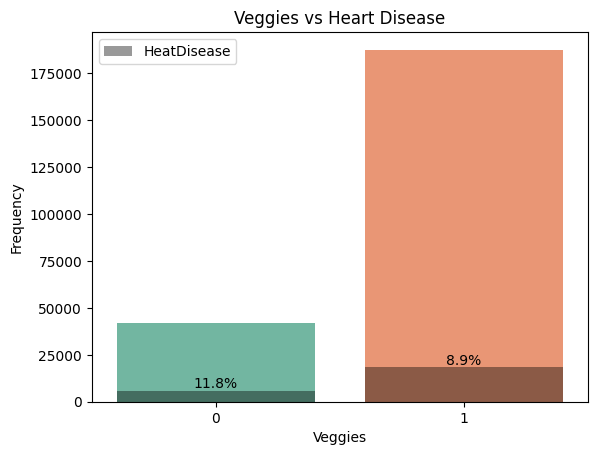

In [20]:
HD_veggies_counts = df[df['HeartDiseaseorAttack']== 1]['Veggies'].value_counts()
NoHD_veggies_counts = df[df['HeartDiseaseorAttack']== 0]['Veggies'].value_counts()
percentage_HD = (HD_veggies_counts / veggies_counts) * 100


sns.countplot(x = 'Veggies', data  = df[df['HeartDiseaseorAttack']==0], palette = 'Set2')
sns.countplot(x = 'Veggies', data =  df[df['HeartDiseaseorAttack'] == 1], color = 'Black', alpha = 0.4, label = 'HeatDisease')
plt.xlabel('Veggies')
plt.ylabel('Frequency')
plt.title('Veggies vs Heart Disease')
plt.legend()

# add percentage for each bar

for i, veggies in enumerate(percentage_HD.index):
    plt.text(veggies, HD_veggies_counts.loc[veggies] + 10, f'{percentage_HD.loc[veggies]:.1f}%', ha='center', va='bottom')


plt.show()

In [21]:
#Proportion of HeartDisease in Sex 0 = female , 1 = male

sex_counts = df['Sex'].value_counts()
HD_sex_counts = df[df['HeartDiseaseorAttack']== 1]['Sex'].value_counts()
percentage_HD = (HD_sex_counts / sex_counts) * 100
print(f'Proportions of H.Diseases with Sex, \n {percentage_HD} ')

Proportions of H.Diseases with Sex, 
 Sex
0     7.187936
1    12.253594
Name: count, dtype: float64 


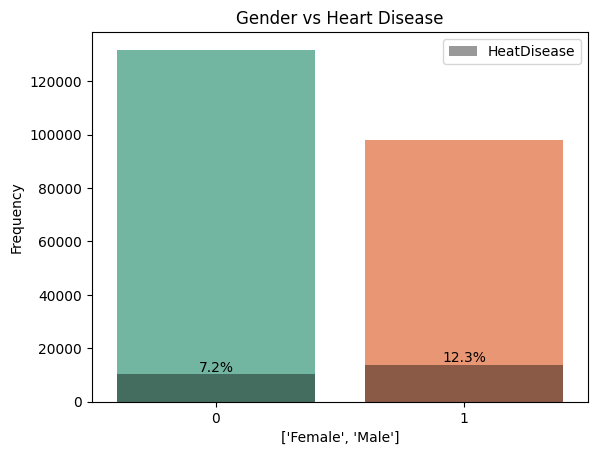

In [22]:
HD_sex_counts = df[df['HeartDiseaseorAttack']== 1]['Sex'].value_counts()
NoHD_sex_counts = df[df['HeartDiseaseorAttack']== 0]['Sex'].value_counts()
sex_counts = df['Sex'].value_counts()
percentage_HD = (HD_sex_counts / sex_counts) * 100


sns.countplot(x = 'Sex', data = df[df['HeartDiseaseorAttack'] == 0], palette = 'Set2')
sns.countplot(x = 'Sex',data =  df[df['HeartDiseaseorAttack'] == 1], color = 'Black', alpha = 0.4, label = 'HeatDisease')
plt.xlabel(['Female', "Male"])
plt.ylabel('Frequency')
plt.title('Gender vs Heart Disease')
plt.legend()

for i, sex in enumerate(percentage_HD.index):
    plt.text(sex, HD_sex_counts.loc[sex] + 10, f'{percentage_HD.loc[sex]:.1f}%', ha='center', va='bottom')

plt.show()

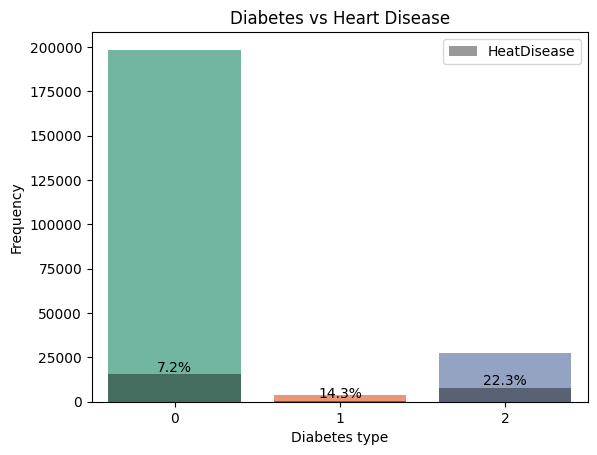

In [23]:
HD_diabetes_counts = df[df['HeartDiseaseorAttack']== 1]['Diabetes'].value_counts()
NoHD_diabetes_counts = df[df['HeartDiseaseorAttack']== 0]['Diabetes'].value_counts()

diabetes_counts = df['Diabetes'].value_counts()
percentage_HD = (HD_diabetes_counts / diabetes_counts) * 100

sns.countplot(x = 'Diabetes', data = df[df['HeartDiseaseorAttack'] == 0], palette = 'Set2')
sns.countplot(x = 'Diabetes',data =  df[df['HeartDiseaseorAttack'] == 1], color = 'Black', alpha = 0.4, label = 'HeatDisease')
plt.xlabel('Diabetes type')
plt.ylabel('Frequency')
plt.title('Diabetes vs Heart Disease')
plt.legend()

for i, diabetes in enumerate(percentage_HD.index):
    plt.text(diabetes, HD_diabetes_counts.loc[diabetes] + 10, f'{percentage_HD.loc[diabetes]:.1f}%', ha='center', va='bottom')

plt.show()

In [24]:
print(percentage_HD)

Diabetes
0     7.183334
2    22.288236
1    14.338156
Name: count, dtype: float64


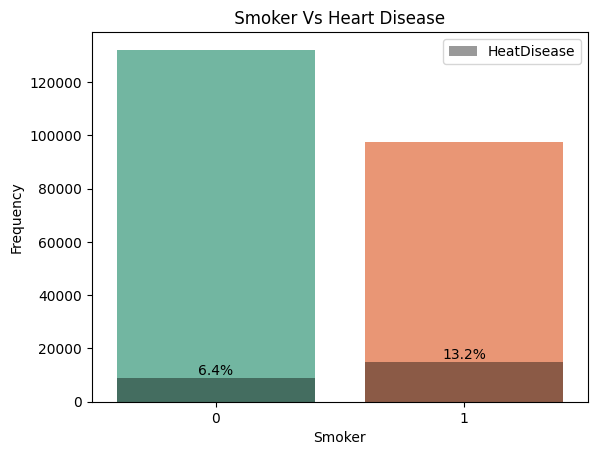

In [25]:
HD_smoke_counts = df[df['HeartDiseaseorAttack']== 1]['Smoker'].value_counts()
NoHD_smoke_counts = df[df['HeartDiseaseorAttack']== 0]['Smoker'].value_counts()

smoke_counts = df['Smoker'].value_counts()
percentage_HD = (HD_smoke_counts / smoke_counts) * 100

sns.countplot(x = 'Smoker', data = df[df['HeartDiseaseorAttack'] ==0], palette = 'Set2')
sns.countplot(x = 'Smoker',data =  df[df['HeartDiseaseorAttack'] == 1], color = 'Black', alpha = 0.4, label = 'HeatDisease')


plt.title(' Smoker Vs Heart Disease ')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.legend()

for i, smoker in enumerate(percentage_HD.index):
    plt.text(smoker, HD_smoke_counts.loc[smoker] + 10, f'{percentage_HD.loc[smoker]:.1f}%', ha='center', va='bottom')

plt.show()

In [26]:
percentage_HD

,count
Smoker,
0,6.436495
1,13.165455


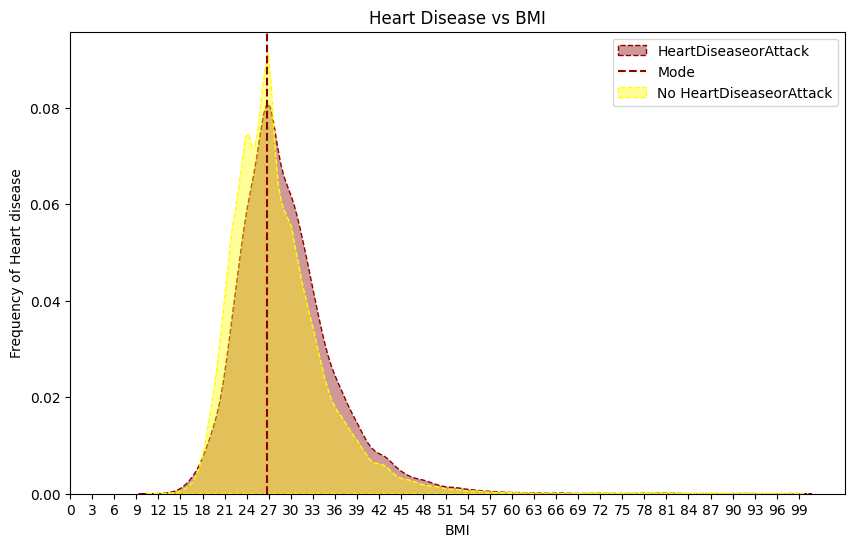

In [27]:
# BMI distribution of H.Disease  and No H.Disease

from scipy import stats

plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['HeartDiseaseorAttack']==1]['BMI'], color='DarkRed', linestyle='--', label='HeartDiseaseorAttack', fill = True, alpha = 0.4)
HD_kde = stats.gaussian_kde(df[df['HeartDiseaseorAttack']==1]['BMI'])
HD_kde_x_range = np.linspace(df['BMI'].min(), df['BMI'].max(), 100)
HD_mode = HD_kde_x_range[np.argmax(HD_kde(HD_kde_x_range))]
plt.axvline(HD_mode, color = 'DarkRed', linestyle = '--', label = 'Mode')

sns.kdeplot(df[df['HeartDiseaseorAttack']==0]['BMI'], color='Yellow', linestyle='--', label='No HeartDiseaseorAttack', fill = True, alpha = 0.4)
NoHD_kde = stats.gaussian_kde(df[df['HeartDiseaseorAttack']==0]['BMI'])
NoHD_kde_x_range = np.linspace(df['BMI'].min(), df['BMI'].max(), 100)
NoHD_mode = NoHD_kde_x_range[np.argmax(NoHD_kde(NoHD_kde_x_range))]
#plt.axvline(NoHD_mode, color = 'Yellow', linestyle = '--', label = 'Mode')

plt.xlabel('BMI')
plt.xlabel('BMI')
plt.xticks(range(0,100, 3))
plt.ylabel('Frequency of Heart disease')
plt.title('Heart Disease vs BMI')
plt.legend()
plt.show()

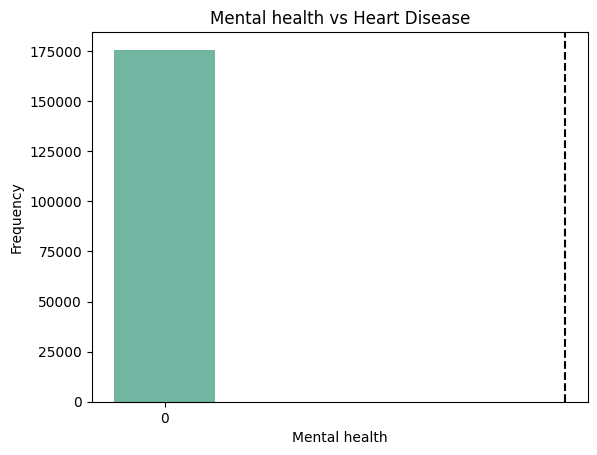

In [28]:
# Original data distribution of Mental Health feature

sns.countplot(x = 'MentHlth', data = df[df['MentHlth']==0], palette = 'Set2')
plt.axvline(x = df['MentHlth'].mean(), color = 'Black', linestyle = '--', label = 'Mean')
plt.xlabel('Mental health')
plt.ylabel('Frequency')
plt.title('Mental health vs Heart Disease')
plt.show()

In [29]:
#Checking proportion in Original DataFrame
#check proportion of having and not having a HeartDiseaseorAttack for each Mental health level
mental_counts = df['MentHlth'].value_counts()
#print(HD_mental_counts)

percentage = round(((mental_counts / len(df)) * 100), 2).sort_values(ascending = False)
print(f'Proportions Mentalhealth levels, {percentage} ')

Proportions Mentalhealth levels, MentHlth
0     69.25
2      5.15
30     4.77
5      3.56
1      3.37
3      2.91
10     2.51
15     2.17
4      1.49
20     1.33
7      1.22
25     0.47
14     0.46
6      0.39
8      0.25
12     0.16
28     0.13
21     0.09
29     0.06
18     0.04
9      0.04
16     0.03
27     0.03
22     0.02
17     0.02
26     0.02
11     0.02
13     0.02
23     0.01
24     0.01
19     0.01
Name: count, dtype: float64 


In [30]:
#checking if replacing 0s with random will affect dataframe or not
df3 = df.copy()

df3.loc[df['MentHlth'] == 0, 'MentHlth'] = df3.loc[df3['MentHlth'] == 0, 'MentHlth'].apply(lambda x: random.randint(1, 30))

#check proportion of having and not having a HeartDiseaseorAttack for each Mental health level
mental_counts3 = df3['MentHlth'].value_counts()
#print(HD_mental_counts)

percentage_HD = round(((mental_counts3 / len(df3)) * 100), 2).sort_values(ascending = False)
print(f'Proportions of H.Diseases with Mentalhealth levels, {percentage_HD} ')

Proportions of H.Diseases with Mentalhealth levels, MentHlth
2     7.50
30    7.03
5     5.82
1     5.67
3     5.16
10    4.83
15    4.50
4     3.74
20    3.64
7     3.55
25    2.81
14    2.75
6     2.66
8     2.52
12    2.48
28    2.44
9     2.42
21    2.41
29    2.41
19    2.36
11    2.36
18    2.35
23    2.35
17    2.35
26    2.34
22    2.33
24    2.32
27    2.31
16    2.30
13    2.27
Name: count, dtype: float64 


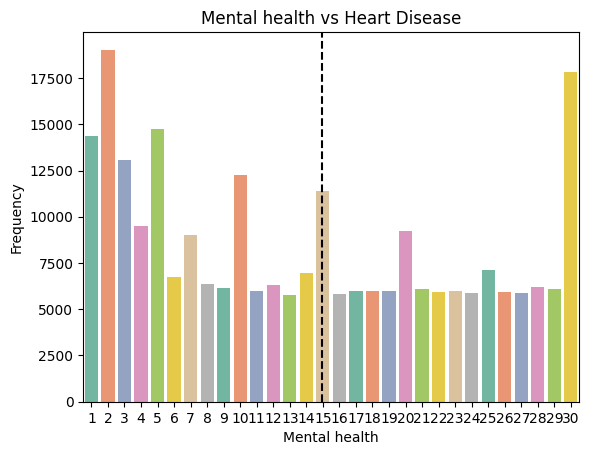

In [31]:
# Original data distribution of Physical Health feature

sns.countplot(x = 'MentHlth', data = df3, palette = 'Set2')
plt.axvline(x = df3['MentHlth'].mean(), color = 'Black', linestyle = '--', label = 'Mean')
plt.xlabel('Mental health')
plt.ylabel('Frequency')
plt.title('Mental health vs Heart Disease')
plt.show()

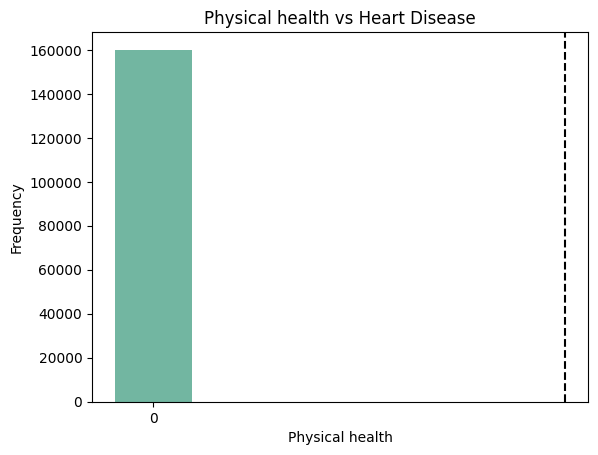

In [32]:
#Checking proportion in Original DataFrame
#check proportion of having and not having a HeartDiseaseorAttack for each Physical health level

sns.countplot(x = 'PhysHlth', data = df[df['PhysHlth']==0], palette = 'Set2')
plt.axvline(x = df['PhysHlth'].mean(), color = 'Black', linestyle = '--', label = 'Mean')
plt.xlabel('Physical health')
plt.ylabel('Frequency')
plt.title('Physical health vs Heart Disease')
plt.show()

In [33]:
phys_counts = df['PhysHlth'].value_counts()
percentage = round(((phys_counts / len(df)) * 100), 2).sort_values(ascending = False)
print(f'Proportions of H.Diseases with Physicalhealth levels, {percentage} ')

Proportions of H.Diseases with Physicalhealth levels, PhysHlth
0     63.09
30     7.65
2      5.82
1      4.49
3      3.35
5      3.00
10     2.21
15     1.94
4      1.79
7      1.79
20     1.29
14     1.02
25     0.53
6      0.52
8      0.32
21     0.26
12     0.23
28     0.21
29     0.08
9      0.07
18     0.06
16     0.04
27     0.04
17     0.04
24     0.03
22     0.03
26     0.03
13     0.03
11     0.02
23     0.02
19     0.01
Name: count, dtype: float64 


In [34]:
df3.loc[df3['PhysHlth'] == 0, 'PhysHlth'] = df3.loc[df['PhysHlth'] == 0, 'PhysHlth'].apply(lambda x: random.randint(1, 30))
phys_counts = df3['PhysHlth'].value_counts()
percentage = round(((phys_counts / len(df3)) * 100), 2).sort_values(ascending = False)
percentage

,count
PhysHlth,
30,9.78
2,7.92
1,6.60
3,5.45
5,5.11
10,4.28
15,4.00
7,3.90
4,3.89


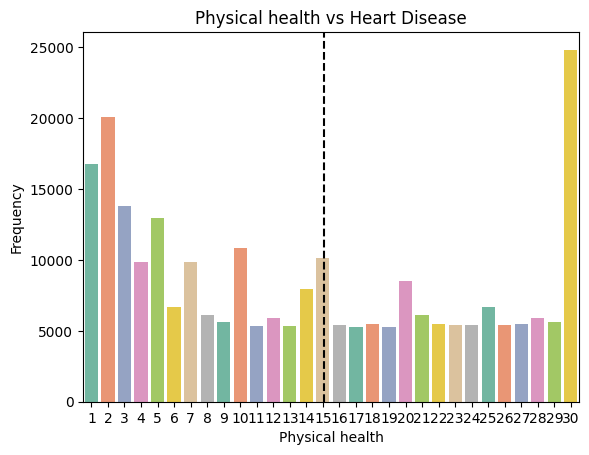

In [35]:
sns.countplot(x = 'PhysHlth', data = df3, palette = 'Set2')
plt.axvline(x = df3['PhysHlth'].mean(), color = 'Black', linestyle = '--', label = 'Mean')
plt.xlabel('Physical health')
plt.ylabel('Frequency')
plt.title('Physical health vs Heart Disease')
plt.show()

In [36]:
# Concluded replacing with Random will not affect proportions of data
#replacing 0 with random numbers in MentHlth and PhysHtth in original data

df.loc[df['MentHlth'] == 0, 'MentHlth'] = df.loc[df['MentHlth'] == 0, 'MentHlth'].apply(lambda x: random.randint(1, 30))
df.loc[df['PhysHlth'] == 0, 'PhysHlth'] = df.loc[df['PhysHlth'] == 0, 'PhysHlth'].apply(lambda x: random.randint(1, 30))

In [37]:
#check proportion of having and not having a HeartDiseaseorAttack for each Mental health level
mental_counts = df['MentHlth'].value_counts()
HD_mental_counts = df[df['HeartDiseaseorAttack']== 1]['MentHlth'].value_counts()
#print(HD_mental_counts)

percentage_HD = round(((HD_mental_counts / mental_counts) * 100), 2).sort_values(ascending = False)
print(f'Proportions of H.Diseases with Mentalhealth levels, {percentage_HD} ')

Proportions of H.Diseases with Mentalhealth levels, MentHlth
30    14.32
15    11.33
20    10.64
25    10.23
10     9.97
22     9.79
23     9.55
19     9.48
9      9.42
14     9.41
16     9.34
27     9.23
12     9.12
21     9.05
18     8.99
8      8.95
28     8.94
29     8.92
13     8.87
5      8.86
24     8.86
6      8.85
4      8.80
17     8.64
7      8.64
3      8.63
26     8.60
11     8.02
2      7.72
1      7.48
Name: count, dtype: float64 


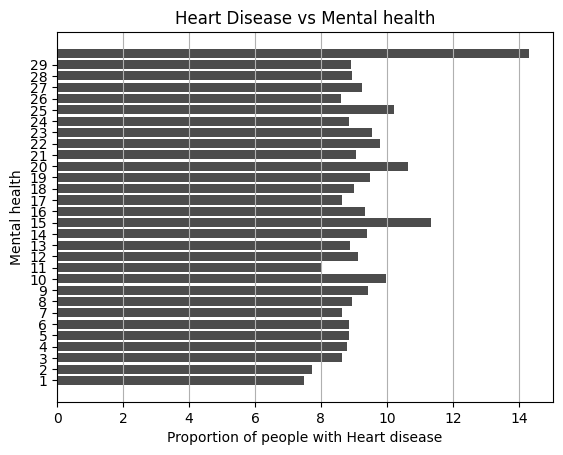

In [38]:
plt.barh(y = percentage_HD.index, width = percentage_HD.values, color = 'Black', label = 'Heart Disease', alpha = 0.7)
plt.grid(True, axis = 'x')
plt.xlabel('Proportion of people with Heart disease')
plt.ylabel('Mental health')
plt.yticks(range(1,30))
plt.title('Heart Disease vs Mental health')
plt.show()

In [39]:
#check proportion of having and not having a HeartDiseaseorAttack for each Physical health level
phealth_counts = df['PhysHlth'].value_counts()
HD_phealth_counts = df[df['HeartDiseaseorAttack']== 1]['PhysHlth'].value_counts()
#print(HD_mental_counts)

percentage_HD = round(((HD_phealth_counts / phealth_counts) * 100), 2).sort_values(ascending = False)
print(f'Proportions of H.Diseases with Physical Health levels, {percentage_HD} ')

Proportions of H.Diseases with Physical Health levels, PhysHlth
30    20.20
15    12.84
20    11.97
10    11.69
5      9.64
25     9.38
4      9.16
14     9.14
7      8.85
3      8.64
6      8.59
28     8.30
8      7.89
12     7.59
29     7.53
21     7.52
2      7.35
24     7.32
18     7.28
13     6.96
11     6.88
17     6.88
27     6.85
16     6.69
9      6.61
26     6.60
19     6.50
23     6.41
22     6.32
1      5.64
Name: count, dtype: float64 


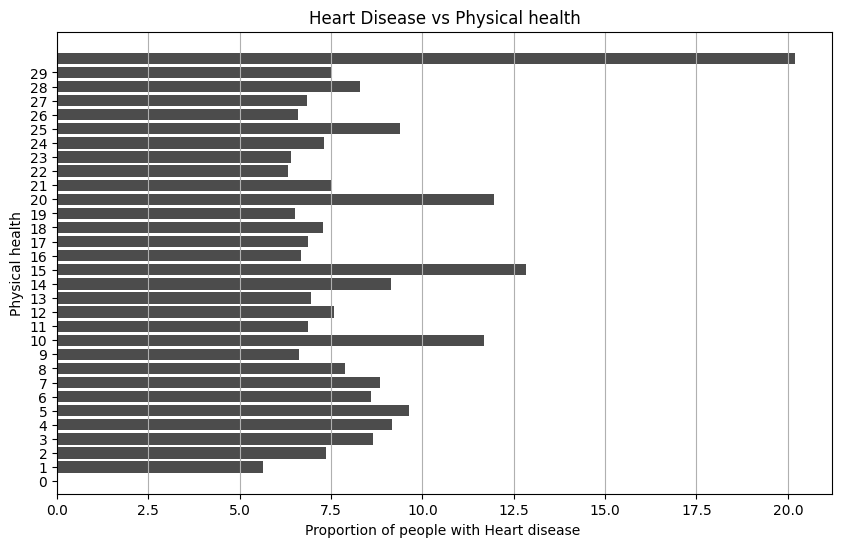

In [40]:
plt.figure(figsize=(10, 6))
plt.barh(y = percentage_HD.index, width = percentage_HD.values, color = 'Black', label = 'Heart Disease', alpha = 0.7)
plt.grid(True, axis = 'x')
plt.yticks(range(0,30))
plt.xlabel('Proportion of people with Heart disease ')
plt.ylabel('Physical health')
plt.title('Heart Disease vs Physical health')
plt.show()

In [41]:
#check proportion of having and not having a HeartDiseaseorAttack for each Age category
age_counts = df['Age'].value_counts()
HD_age_counts = df[df['HeartDiseaseorAttack']== 1]['Age'].value_counts()
#print(HD_mental_counts)

percentage_HD = round(((HD_age_counts / age_counts) * 100), 2).sort_values(ascending = False)
print(f'Proportions of H.Diseases with Physical Health levels, {percentage_HD} ')

Proportions of H.Diseases with Physical Health levels, Age
13    23.95
12    19.36
11    16.77
10    13.02
9     10.10
8      7.31
7      5.42
6      3.59
5      2.17
4      1.40
3      1.13
2      0.71
1      0.51
Name: count, dtype: float64 


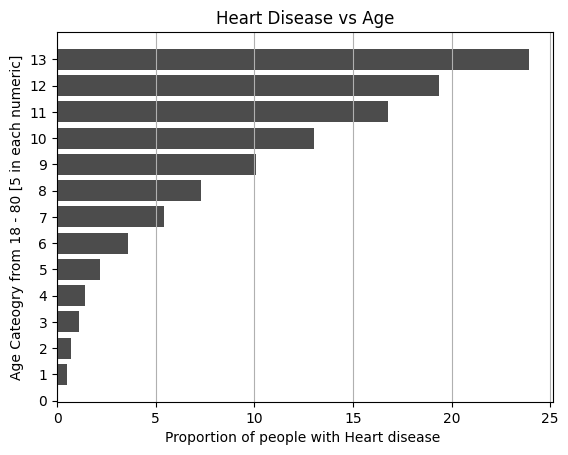

In [42]:
plt.barh(y = percentage_HD.index, width = percentage_HD.values, color = 'Black', label = 'Heart Disease', alpha = 0.7)
plt.grid(True, axis = 'x')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.xlabel('Proportion of people with Heart disease ')
plt.ylabel('Age Cateogry from 18 - 80 [5 in each numeric]')
plt.title('Heart Disease vs Age')
plt.show()

#Model


1.   Selecting best features
2.   Scaling and Hot encoding features - with and without oversampling
3.   No scaling or encoding - with and without oversampling
4.   Run different models after finding best paramters in RandomSearchCV
5.   Returning  Classification report, confusion matrix
6.   Calculating AUC scores
7.   Caculating best threshold for classification by (TPR - FPR)
8.   Returning Classification reports after predicting on Best Threshold

[Logistic, SVM, Boosting]

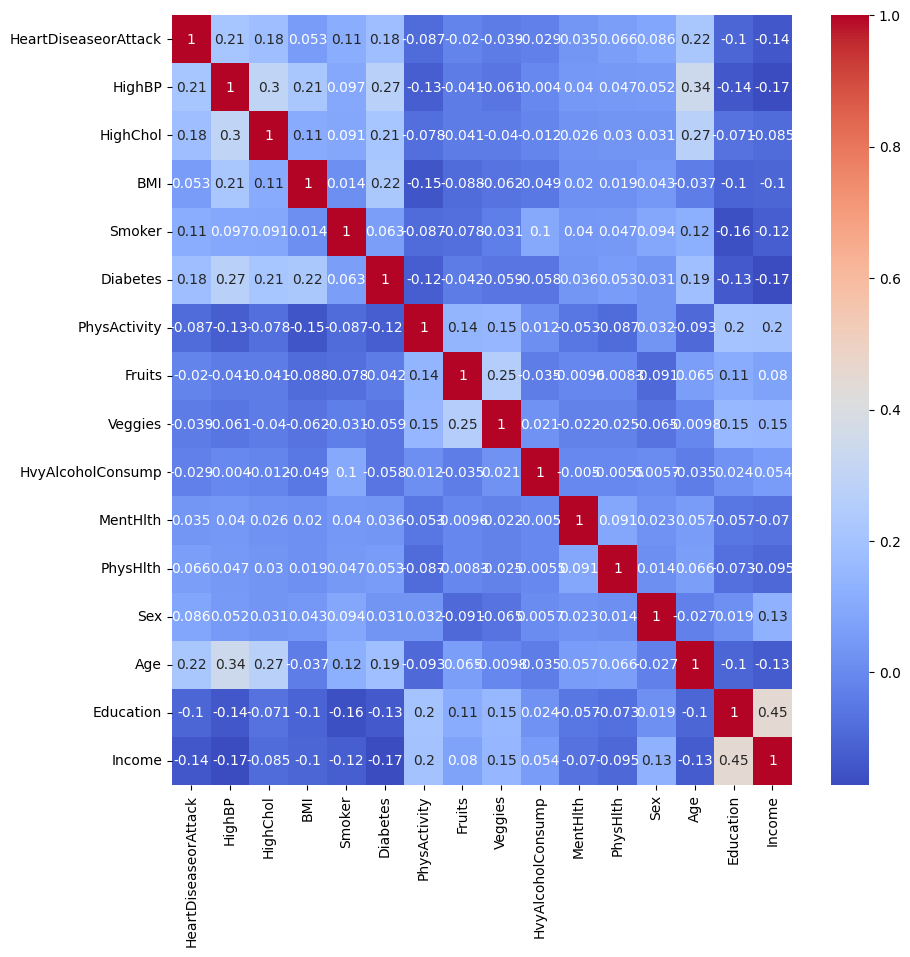

In [43]:
correlation = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')
plt.show()

Text(0.5, 0, 'Correlation')

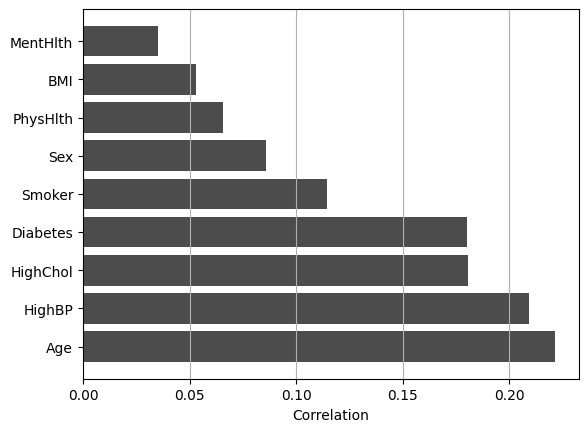

In [44]:
# getting top 10 best features
feats = correlation['HeartDiseaseorAttack'].sort_values(ascending = False)[:10].drop('HeartDiseaseorAttack')
plt.barh(y = feats.index, width = feats.values, color = 'Black', label = 'Heart Disease', alpha = 0.7)
plt.grid(True, axis = 'x')
plt.xlabel('Correlation')


In [ ]:
feats.index

Index(['Age', 'HighBP', 'PhysHlth', 'HighChol', 'Diabetes', 'Smoker', 'Sex',
       'MentHlth', 'BMI'],
      dtype='object')

In [ ]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [45]:
#making a new DF for Onehot encoded and Scaled features

df2 = df.copy()
categorical_feats = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex']

scaler = StandardScaler()
df2['BMI'] = scaler.fit_transform(df2[['BMI']])

onehot = OneHotEncoder()
encoded_features = onehot.fit_transform(df2[categorical_feats])

encoded_df = pd.DataFrame(encoded_features.toarray().astype(int), columns=onehot.get_feature_names_out())

df2 = pd.concat([df2.drop(categorical_feats, axis=1), encoded_df], axis=1)
df2

,HeartDiseaseorAttack,BMI,MentHlth,PhysHlth,Age,Education,Income,HighBP_0,HighBP_1,HighChol_0,...,PhysActivity_0,PhysActivity_1,Fruits_0,Fruits_1,Veggies_0,Veggies_1,HvyAlcoholConsump_0,HvyAlcoholConsump_1,Sex_0,Sex_1
0,0,1.757936,18,15,9,4,3,0,1,0,...,1,0,1,0,0,1,1,0,1,0
1,0,-0.511806,23,14,7,6,1,1,0,1,...,0,1,1,0,1,0,1,0,1,0
2,0,-0.057858,30,30,9,4,8,0,1,0,...,1,0,0,1,1,0,1,0,1,0
3,0,-0.209174,17,7,11,3,6,0,1,1,...,0,1,0,1,0,1,1,0,1,0
4,0,-0.663122,3,2,11,5,4,0,1,0,...,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,2.514516,21,5,5,6,7,0,1,0,...,1,0,0,1,0,1,1,0,0,1
253676,0,-1.571019,7,18,11,2,4,0,1,0,...,1,0,1,0,1,0,1,0,1,0
253677,0,-0.057858,21,18,2,5,2,1,0,1,...,0,1,0,1,1,0,1,0,1,0
253678,0,-0.814438,22,12,7,5,1,0,1,1,...,1,0,0,1,0,1,1,0,0,1


In [44]:
len(onehot.get_feature_names_out())

19

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  int64  
 1   BMI                   253680 non-null  float64
 2   MentHlth              253680 non-null  int64  
 3   PhysHlth              253680 non-null  int64  
 4   Age                   253680 non-null  int64  
 5   Education             253680 non-null  int64  
 6   Income                253680 non-null  int64  
 7   HighBP_0              253680 non-null  int64  
 8   HighBP_1              253680 non-null  int64  
 9   HighChol_0            253680 non-null  int64  
 10  HighChol_1            253680 non-null  int64  
 11  Smoker_0              253680 non-null  int64  
 12  Smoker_1              253680 non-null  int64  
 13  Diabetes_0            253680 non-null  int64  
 14  Diabetes_1            253680 non-null  int64  
 15  

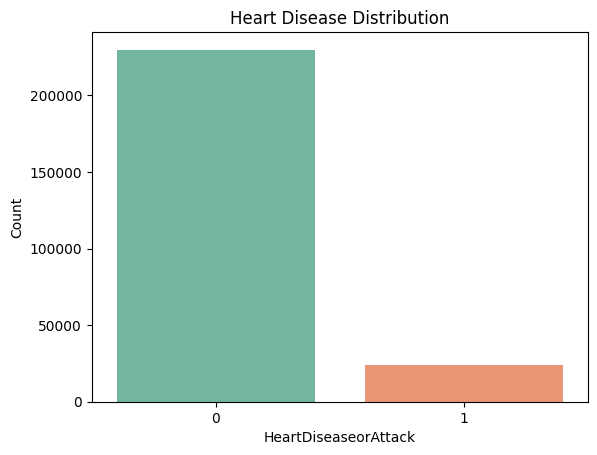

In [46]:
sns.countplot(x = 'HeartDiseaseorAttack', data = df2, palette = 'Set2')
plt.xlabel('HeartDiseaseorAttack')
plt.ylabel('Count')
plt.title('Heart Disease Distribution')
plt.show()

In [46]:
'''
People with No heart Disease are 90%
People with Heart Disease are 10%  of the data

'''

HD = len(df[df['HeartDiseaseorAttack'] == 1])
NoHD = len(df[df['HeartDiseaseorAttack'] == 0])
len_df = len(df)

HD_percentage = (HD / len_df) * 100
NoHD_percentage = (NoHD / len_df) * 100

print(f'Percentage of people with Heart Disease: {HD_percentage:.2f}%')
print(f'Percentage of people without Heart Disease: {NoHD_percentage:.2f}%')



Percentage of people with Heart Disease: 9.42%
Percentage of people without Heart Disease: 90.58%


In [47]:

"""X, y  from df (without scaling and one hot encoding) """
sm = SMOTE(random_state=42)

X1  = df.drop('HeartDiseaseorAttack', axis = 1)
y1 = df['HeartDiseaseorAttack']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, shuffle = True)
X1_train_res, y1_train_res = sm.fit_resample(X1_train, y1_train)



"""  X, y  from df2 (With Scaling and One hot encoding)"""

X2 = df2.drop('HeartDiseaseorAttack', axis = 1)
y2 = df2['HeartDiseaseorAttack']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, shuffle = True)
X2_train_res, y2_train_res = sm.fit_resample(X2_train, y2_train)


'''

X1_train_res, y1_train_res - oversampled for df which is original Data without scaling and one hot encoding

X2_train_res, y2_train_res  - oversampled for df2 which has scaled and hot encoded features

'''

'\n\nX1_train_res, y1_train_res - oversampled for df which is original Data without scaling and one hot encoding\n\nX2_train_res, y2_train_res  - oversampled for df2 which has scaled and hot encoded features\n\n'

In [ ]:
X2_train_res.columns

Index(['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'HighBP_0',
       'HighBP_1', 'HighChol_0', 'HighChol_1', 'Smoker_0', 'Smoker_1',
       'Diabetes_0', 'Diabetes_1', 'Diabetes_2', 'PhysActivity_0',
       'PhysActivity_1', 'Fruits_0', 'Fruits_1', 'Veggies_0', 'Veggies_1',
       'HvyAlcoholConsump_0', 'HvyAlcoholConsump_1', 'Sex_0', 'Sex_1'],
      dtype='object')

In [48]:
""" Gradient Boost model on df2"""


X_train_res = X2_train_res.copy()
y_train_res = y2_train_res.copy()
X_test = X2_test.copy()
y_test = y2_test.copy()


#parameters from RandonSearchCV
gb = GradientBoostingClassifier(learning_rate=0.1978475681165901, loss='exponential',
                           max_depth=5, max_features=5, min_samples_leaf=3,
                           min_samples_split=9, n_estimators=222,
                           n_iter_no_change=5, subsample=0.945643269722372,
                           validation_fraction=0.17355662654385065)

gb.fit(X_train_res, y_train_res)

y_pred = gb.predict(X_test)

# cv = cross_val_score(gb, X,y, cv = 10, scoring = 'roc_auc')
# print('CV mean',cv.mean())
# print('CV std',cv.std())

probabilites = gb.predict_proba(X_test)[:, 1]


print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')


fpr, tpr, thresholds = roc_curve(y_test, probabilites)
j_statistic = tpr - fpr  # Calculate Youden’s J statistic
optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
optimal_threshold = thresholds[optimal_idx]

print('\n Optimal threshold', optimal_threshold)


optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# Evaluation with the new threshold
print(f'\n New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
print(f'AUC Score (GradientBooster) :{round(roc_auc, 3)}')

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     45968
           1       0.39      0.16      0.22      4768

    accuracy                           0.90     50736
   macro avg       0.65      0.57      0.58     50736
weighted avg       0.87      0.90      0.88     50736

Confusion Matrix:
 [[44771  1197]
 [ 4017   751]]

 Optimal threshold 0.1190229839695805

 New Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.21      0.79      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.74      0.57     50736
weighted avg       0.90      0.71      0.77     50736

New Confusion Matrix:
 [[32155 13813]
 [ 1020  3748]]
AUC Score (GradientBooster) :0.813


In [ ]:
from sklearn.metrics import fbeta_score
fbeta = fbeta_score(y_test, optimal_threshold_y_pred, beta=2)
print('fbeta', fbeta)

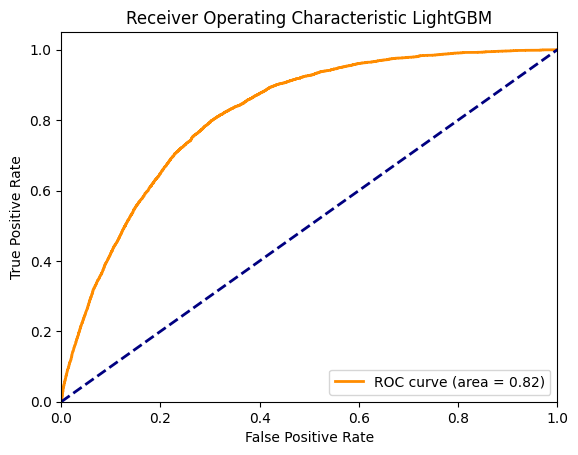

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, probabilites)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

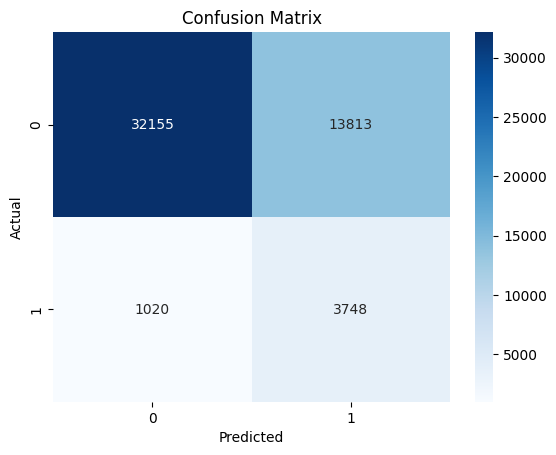

In [49]:
sns.heatmap(confusion_matrix(y_test, optimal_threshold_y_pred), annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Text(0, 0.5, 'Feature')

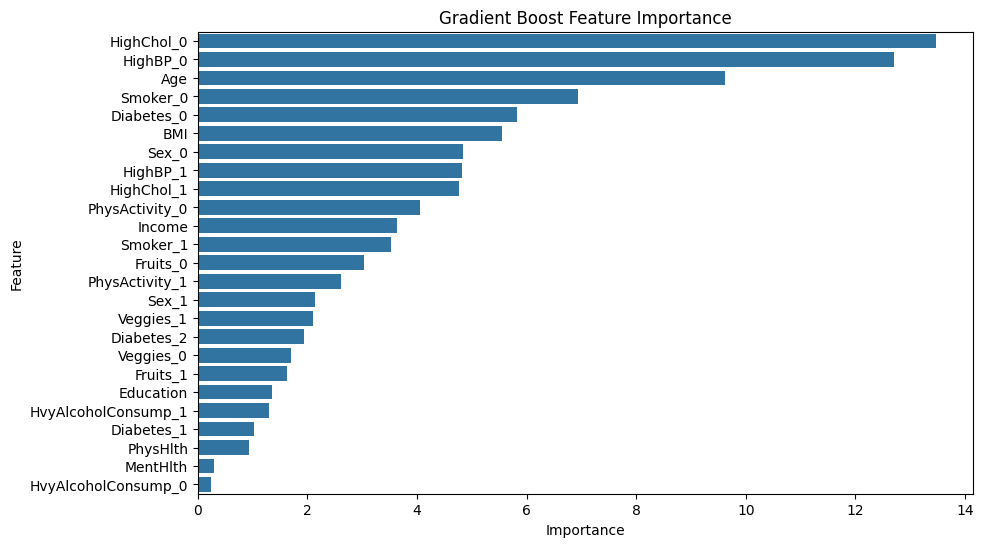

In [56]:
feature_importance = gb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_res.columns, 'Importance': feature_importance * 100})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Gradient Boost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

## Rejected Models

In [ ]:
#!pip install catboost

In [ ]:


# """Gradient with df """

# X_train_res = X1_train_res.copy()
# y_train_res = y1_train_res.copy()
# X_test = X1_test.copy()
# y_test = y1_test.copy()

# gb = GradientBoostingClassifier(learning_rate=0.1978475681165901, loss='exponential',
#                            max_depth=5, max_features=5, min_samples_leaf=3,
#                            min_samples_split=9, n_estimators=222,
#                            n_iter_no_change=5, subsample=0.945643269722372,
#                            validation_fraction=0.17355662654385065)
# gb.fit(X_train_res, y_train_res)

# y_pred = gb.predict(X_test)

# probabilites = gb.predict_proba(X_test)[:, 1]

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')


# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (GradientBooster) on Probabilities: {round(roc_auc, 3)}')

Accuracy: 0.7305660674865972
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81     45968
           1       0.19      0.66      0.30      4768

    accuracy                           0.70     50736
   macro avg       0.57      0.68      0.55     50736
weighted avg       0.88      0.70      0.76     50736

Confusion Matrix:
 [[32601 13367]
 [ 1630  3138]]
Optimal threshold 0.38962812456487544
New Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.61      0.75     45968
           1       0.17      0.78      0.28      4768

    accuracy                           0.63     50736
   macro avg       0.57      0.70      0.52     50736
weighted avg       0.89      0.63      0.71     50736

New Confusion Matrix:
 [[28251 17717]
 [ 1037  3731]]
AUC Score (GradientBooster) on Probabilities: 0.752


In [ ]:
# from catboost import CatBoostClassifier

# """catboost with df2"""

# X_train_res = X2_train_res.copy()
# y_train_res = y2_train_res.copy()
# X_test = X2_test.copy()
# y_test = y2_test.copy()

# for feature in ['MentHlth', 'PhysHlth', 'Age', 'HighBP_0', 'HighBP_1',
#                                                'HighChol_0', 'HighChol_1', 'Smoker_0', 'Smoker_1', 'Diabetes_0',
#                                                'Diabetes_1', 'Diabetes_2', 'Sex_0', 'Sex_1']:
#     X_train_res[feature] = X_train_res[feature].astype(str)
#     X_test[feature] = X_test[feature].astype(str) # Also convert in the test set

# cb_model = CatBoostClassifier( verbose = 0, loss_function = 'Logloss', random_state = 42, eval_metric = 'AUC',
#                               cat_features =  ['MentHlth', 'PhysHlth', 'Age', 'HighBP_0', 'HighBP_1',
#                                                'HighChol_0', 'HighChol_1', 'Smoker_0', 'Smoker_1', 'Diabetes_0',
#                                                'Diabetes_1', 'Diabetes_2', 'Sex_0', 'Sex_1'])

# cb_model.fit(X_train_res, y_train_res)

# y_pred = cb_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# probabilites = cb_model.predict_proba(X_test)[:, 1]

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')


# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (CatBoost) on Probabilities: {round(roc_auc, 3)}')

Accuracy: 0.9026332387259539
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     45968
           1       0.41      0.08      0.13      4768

    accuracy                           0.90     50736
   macro avg       0.66      0.53      0.54     50736
weighted avg       0.86      0.90      0.87     50736

Confusion Matrix:
 [[45422   546]
 [ 4394   374]]
Optimal threshold 0.0907263813905426
New Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.80     45968
           1       0.21      0.78      0.33      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.74      0.57     50736
weighted avg       0.90      0.70      0.76     50736

New Confusion Matrix:
 [[31606 14362]
 [ 1037  3731]]
AUC Score (CatBoost) on Probabilities: 0.803


fbeta 0.0935374149659864


In [ ]:
# from catboost import CatBoostClassifier

# """catboost with df"""

# X_train_res = X1_train_res.copy()
# y_train_res = y1_train_res.copy()
# X_test = X1_test.copy()
# y_test = y1_test.copy()

# for feature in ['HighBP', 'HighChol', 'Smoker', 'Diabetes','Sex', 'MentHlth', 'PhysHlth', 'Age']:
#     X_train_res[feature] = X_train_res[feature].astype(str)
#     X_test[feature] = X_test[feature].astype(str) # Also convert in the test set

# cb_model = CatBoostClassifier( verbose = 0, loss_function = 'Logloss', random_state = 42, eval_metric = 'AUC',
#                               cat_features =  ['HighBP', 'HighChol', 'Smoker', 'Diabetes','Sex', 'MentHlth', 'PhysHlth', 'Age'])

# cb_model.fit(X_train_res, y_train_res)

# y_pred = cb_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# probabilites = cb_model.predict_proba(X_test)[:, 1]

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')


# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (CatBoost) on Probabilities: {round(roc_auc, 3)}')

Accuracy: 0.7305660674865972
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.75      0.83     45968
           1       0.19      0.56      0.28      4768

    accuracy                           0.73     50736
   macro avg       0.57      0.66      0.56     50736
weighted avg       0.87      0.73      0.78     50736

Confusion Matrix:
 [[34386 11582]
 [ 2088  2680]]
Optimal threshold 0.29366811697892425
New Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72     45968
           1       0.16      0.78      0.27      4768

    accuracy                           0.60     50736
   macro avg       0.56      0.68      0.49     50736
weighted avg       0.89      0.60      0.68     50736

New Confusion Matrix:
 [[26537 19431]
 [ 1029  3739]]
AUC Score (CatBoost) on Probabilities: 0.737


In [ ]:
# from xgboost import XGBClassifier

# """ XGradient with df2"""

# X_train_res = X2_train_res.copy()
# y_train_res = y2_train_res.copy()
# X_test = X2_test.copy()
# y_test = y2_test.copy()

# xgb = XGBClassifier(Objective= 'g', colsample_bylevel = 0.5,
#                     colsample_bytree = 0.5, learning_rate = 0.1999749158180029,
#                     max_depth= 8, n_estimator= 187,
#                     reg_alpha = 1, reg_lambda = 0,
#                     sub_sample= 0.8285733635843882,
#                     tree_method = 'hist')
# xgb.fit(X_train_res, y_train_res)

# y_pred = xgb.predict(X_test)

# probabilites = xgb.predict_proba(X_test)[:, 1]

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

# cv_auc_scores = cross_val_score(xgb, X2, y2, cv=3, scoring='roc_auc')
# print(f"Cross-validated AUC on original data: {cv_auc_scores.mean()}")

# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (XGB) on Probabilities: {round(roc_auc, 3)}')

Accuracy: 0.7305660674865972
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     45968
           1       0.37      0.14      0.20      4768

    accuracy                           0.90     50736
   macro avg       0.65      0.56      0.57     50736
weighted avg       0.86      0.90      0.88     50736

Confusion Matrix:
 [[44891  1077]
 [ 4124   644]]
Optimal threshold 0.112266034
New Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.81      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.74      0.56     50736
weighted avg       0.90      0.69      0.75     50736

New Confusion Matrix:
 [[31050 14918]
 [  896  3872]]
AUC Score (XGB) on Probabilities: 0.813


Accuracy: 0.7305660674865972
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     45968
           1       0.19      0.65      0.30      4768

    accuracy                           0.71     50736
   macro avg       0.57      0.68      0.56     50736
weighted avg       0.88      0.71      0.77     50736

Confusion Matrix:
 [[32966 13002]
 [ 1691  3077]]
Optimal threshold 0.3958206
New Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.63      0.76     45968
           1       0.18      0.77      0.29      4768

    accuracy                           0.64     50736
   macro avg       0.57      0.70      0.52     50736
weighted avg       0.89      0.64      0.71     50736

New Confusion Matrix:
 [[28735 17233]
 [ 1107  3661]]
AUC Score (XGB) on Probabilities: 0.752


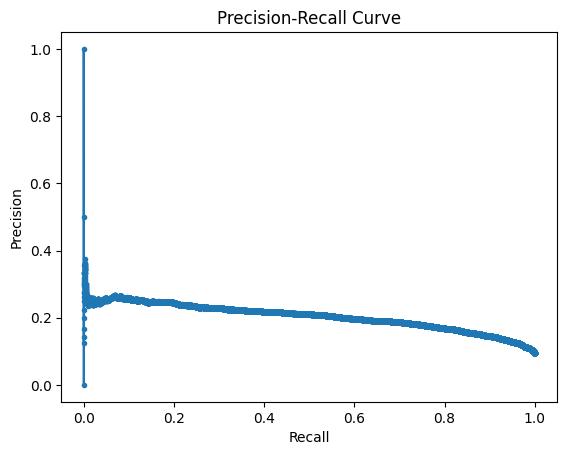

In [ ]:
# from xgboost import XGBClassifier

# """XGradient with df"""

# X_train_res = X1_train_res.copy()
# y_train_res = y1_train_res.copy()
# X_test = X1_test.copy()
# y_test = y1_test.copy()

# xgb = XGBClassifier(Objective= 'g', colsample_bylevel = 0.5,
#                     colsample_bytree = 0.5, learning_rate = 0.1999749158180029,
#                     max_depth= 8, n_estimator= 187,
#                     reg_alpha = 0, reg_lambda = 1,
#                     sub_sample= 0.8285733635843882,
#                     tree_method = 'hist')
# xgb.fit(X_train_res, y_train_res)

# y_pred = xgb.predict(X_test)
# probabilites = xgb.predict_proba(X_test)[:, 1]

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')


# #getting best threshold
# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (XGB) on Probabilities: {round(roc_auc, 3)}')


# # Optional: Precision-Recall Curve (for imbalanced datasets)
# precision, recall, thresholds_pr = precision_recall_curve(y_test, probabilites)
# plt.plot(recall, precision, marker='.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.show()

In [ ]:
# importances = xgb.feature_importances_
# feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances.astype(float)})
# feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
# plt.title('XGBoost Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('Feature')

In [ ]:
# import lightgbm as lgb

# """Light Gradient with df"""

# X_train_res = X1_train_res.copy()
# y_train_res = y1_train_res.copy()
# X_test = X1_test.copy()
# y_test = y1_test.copy()

# train_data = lgb.Dataset(X_train_res, label=y_train_res)
# val_data = lgb.Dataset(X_test, label=y_test)
# param = {'objective': 'binary', 'metric': 'binary_logloss', 'num_leaves': 31, 'learning_rate': 0.1, 'feature_fraction': 1, 'max_depth' : 6, 'gamma' : 0.7, 'boosting_type' : 'goss'}
# lgbm_model = lgb.train(param, train_data, valid_sets=val_data)



# y_pred = lgbm_model.predict(X_test).astype(int)


# #probabilites = lgbm_model.predict_proba(X_test)[:, 1]

# probabilities = 1/ 1 + np.exp(-lgbm_model.predict(X_test))



# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')


# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (LightGBM) on Probabilities: {round(roc_auc, 3)}')

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 183819, number of negative: 183819
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 367638, number of used features: 15
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Unknow

In [ ]:
""" too slow """
# from sklearn.svm import SVC

# SVM_model = SVC(gamma = 1)
# SVM_model.fit(X_train, y_train)

# y_pred = SVM_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# knn_model = KNeighborsClassifier(n_neighbors = 20, weights = 'distance',p = 1 )
# knn_model.fit(X_train_res, y_train_res)

# y_pred = knn_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
# knn_predict_prob = knn_model.predict_proba(X_test)[:, 1]

In [ ]:
# rf_model = RandomForestClassifier(class_weight= 'balanced', warm_start = True)

# rf_model.fit(X_train_res, y_train_res)

# y_pred = rf_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')

In [ ]:
# rf_predict_prob = rf_model.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, rf_predict_prob)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# dt_model = DecisionTreeClassifier(class_weight = 'balanced', criterion = 'gini' )
# dt_model.fit(X_train_res, y_train_res)

# y_pred = dt_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}')
# dt_predict_prob = dt_model.predict_proba(X_test)[:, 1]

In [ ]:
# optimal_threshold = (thresholds[np.argmax(tpr - fpr)])
# print('optimal_threshold', optimal_threshold)
# y_pred_new = (rf_predict_prob >= optimal_threshold).astype(int)
# print(classification_report(y_test, y_pred_new))

In [ ]:
# rf_importances = rf_model.feature_importances_
# feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_importances})
# feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
# plt.title('Random Forest Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.show()


# Verdict for w/o Feature engineering models from Above

1. [Over_sampling + scaling + hot encoded gets better results]
2. Best Model = Gradient Boosting Model with scaled, hot-encoded and oversampled

Classification Report:

               precision    recall  f1-score   support
           0       0.92      0.98      0.95     45968
           1       0.38      0.15      0.21      4768
    accuracy                           0.90     50736
    macro avg       0.65      0.56     0.58     50736
    weighted avg    0.87      0.90     0.88     50736

Confusion Matrix:

 [44849  1119]

 [ 4074   694]


---


 Optimal threshold 0.11329701692558232



>New Classification Report after Optimised Threshold



               precision    recall  f1-score   support

           0       0.97      0.70      0.81     45968
           1       0.22      0.80      0.34      4768

    accuracy                           0.71     50736
    macro avg      0.59      0.75      0.58     50736
    weighted avg   0.90      0.71      0.77     50736

> New Confusion Matrix  after Optimised Threshold

 [[32092 13876]

 [  963  3805]]

AUC Score (GradientBooster) :0.815






# new model after Feature engineering and training


1. Feature engineering on "non_null" data- with and without oversampling

  1a.Data =  0s removed from Physical and Menthal health features
2. Run different models after finding best paramters in RandomSearchCV
3. Returning Classification report, confusion matrix
4. Calculating AUC scores
5. Caculating best threshold for classification by (TPR - FPR)
6. Returning Classification reports after predicting on Best Threshold

In [50]:
df_interactions = df.copy()
df_interactions['HealthIndex'] = round((df_interactions['PhysHlth'] + df_interactions['MentHlth'] + df_interactions['PhysActivity']) / 3, 2)

df_interactions['BMI'] = df_interactions['BMI'] ** 2
df_interactions['BPCH'] = (df_interactions['HighBP'] + df_interactions['HighChol'] ) / 2
df_interactions['FruVeg'] = ( df_interactions['Fruits'] + df_interactions['Veggies']) / 2
df_interactions['EduInc'] = ( df_interactions['Education'] + df_interactions['Income'] ) / 2
df_interactions['SmAlDiAge'] = ( df_interactions['Smoker'] + df_interactions['HvyAlcoholConsump'] + df_interactions['Diabetes'] + df_interactions['Age'] )/4

In [51]:
df_interactions.drop(['PhysActivity','HighBP', 'HighChol', 'Education', 'Income', 'Fruits', 'Veggies', 'Smoker', 'Diabetes', 'HvyAlcoholConsump', 'Diabetes', 'Age'], axis = 1, inplace = True)
df_interactions.head()

,HeartDiseaseorAttack,BMI,MentHlth,PhysHlth,Sex,HealthIndex,BPCH,FruVeg,EduInc,SmAlDiAge
0,0,1600,18,15,0,11.00,1.0,0.5,3.5,2.50
1,0,625,23,14,0,12.67,0.0,0.0,3.5,2.00
2,0,784,30,30,0,20.00,1.0,0.5,6.0,2.25
3,0,729,17,7,0,8.33,0.5,1.0,4.5,2.75
4,0,576,3,2,0,2.00,1.0,1.0,4.5,2.75


##EDA

In [61]:
round(df_interactions.describe(), 2)

,HeartDiseaseorAttack,BMI,Sex,HealthIndex,BPCH,FruVeg,EduInc,SmAlDiAge
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.09,849.23,0.44,9.57,0.43,0.72,5.55,2.21
std,0.29,484.83,0.50,4.73,0.40,0.35,1.33,0.84
min,0.00,144.00,0.00,0.67,0.00,0.00,1.00,0.25
25%,0.00,576.00,0.00,6.00,0.00,0.50,4.50,1.75
50%,0.00,729.00,0.00,9.67,0.50,1.00,6.00,2.25
75%,0.00,961.00,1.00,12.67,1.00,1.00,6.50,2.75
max,1.00,9604.00,1.00,20.33,1.00,1.00,7.00,4.25


In [62]:
df_interactions[df_interactions['BPCH'] ==  1]

,HeartDiseaseorAttack,BMI,Sex,HealthIndex,BPCH,FruVeg,EduInc,SmAlDiAge
0,0,1600,0,11.00,1.0,0.5,3.5,2.50
2,0,784,0,20.00,1.0,0.5,6.0,2.25
4,0,576,0,11.33,1.0,1.0,4.5,2.75
5,0,625,1,2.33,1.0,1.0,7.0,2.75
7,0,625,0,9.67,1.0,0.5,4.0,3.00
...,...,...,...,...,...,...,...,...
253670,1,625,0,14.67,1.0,0.5,5.0,3.75
253671,1,529,1,8.33,1.0,0.0,2.5,2.00
253675,0,2025,1,4.33,1.0,1.0,6.5,1.25
253676,0,324,0,3.00,1.0,0.0,3.0,3.25


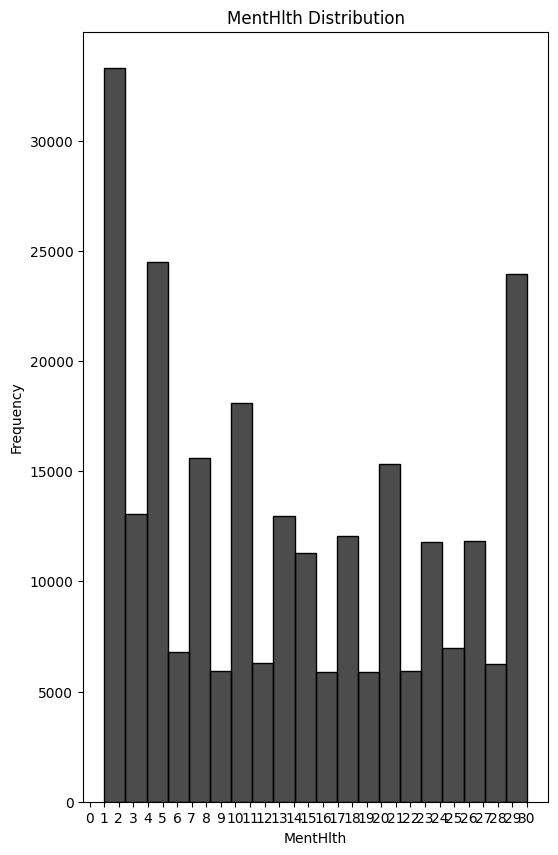

In [63]:
plt.figure(figsize=(6, 10))
sns.histplot(df['MentHlth'], bins=20, color='Black', alpha=0.7)
plt.xlabel('MentHlth')
plt.xticks(range(0,31))
plt.ylabel('Frequency')
plt.title('MentHlth Distribution')
plt.show()

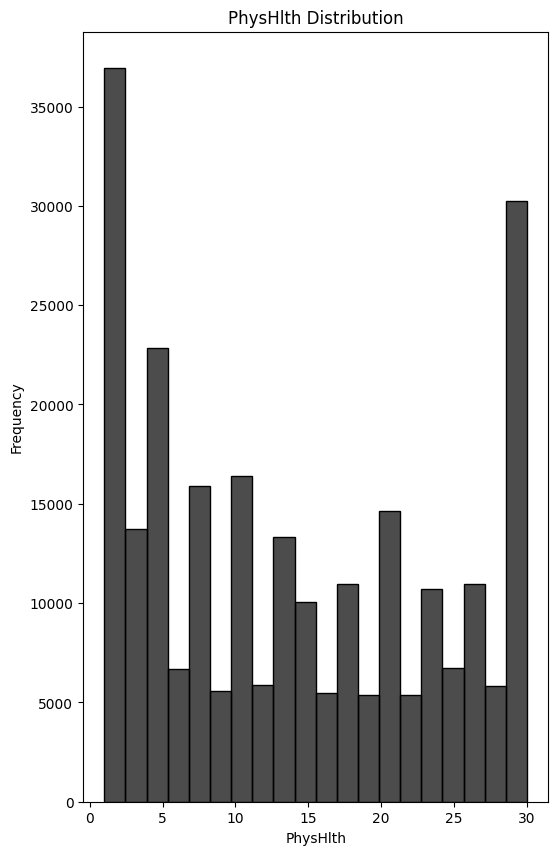

In [64]:
plt.figure(figsize=(6, 10))
sns.histplot(df['PhysHlth'], bins=20, color='Black', alpha=0.7)
plt.xlabel('PhysHlth')
plt.xticks(range(0,31))
plt.ylabel('Frequency')
plt.title('PhysHlth Distribution')
plt.show()

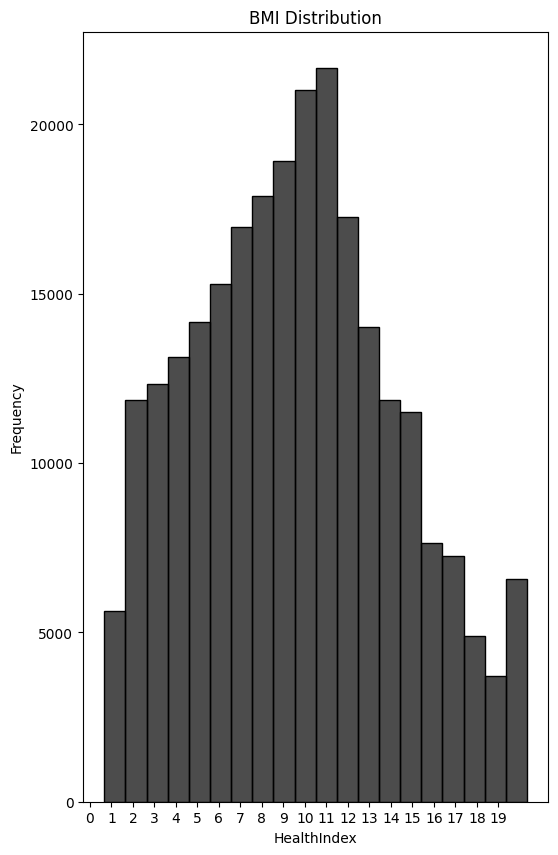

'\nHealth index has more 0 values because MentHlth and PhysHlth has majority Zero counts\n'

In [65]:
plt.figure(figsize=(6, 10))
sns.histplot(df_interactions['HealthIndex'], bins=20, color='Black', alpha=0.7)
plt.xlabel('HealthIndex')
plt.xticks(range(0, 25))
plt.ylabel('Frequency')
plt.title('Health Distribution')
plt.show()


"""
Health index has more 0 values because MentHlth and PhysHlth has majority Zero counts
"""

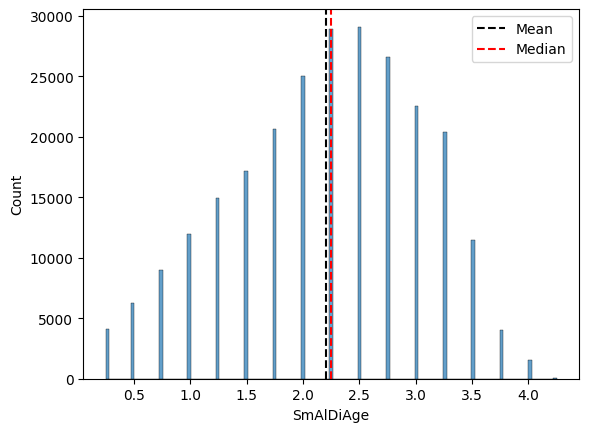

'\nSmoking, Alcohol, Diabetes and Age all combined\n\n'

In [66]:
sns.histplot(df_interactions['SmAlDiAge'], alpha = 0.7)
plt.axvline(df_interactions['SmAlDiAge'].mean(), color = 'Black', linestyle = '--', label = 'Mean')
plt.axvline(df_interactions['SmAlDiAge'].median(), color = 'Red', linestyle = '--', label = 'Median')
plt.legend()
plt.show()

"""
Smoking, Alcohol, Diabetes and Age all combined

"""

In [67]:
df_interactions.corr()['HeartDiseaseorAttack'].sort_values(ascending = False)

,HeartDiseaseorAttack
HeartDiseaseorAttack,1.000000
SmAlDiAge,0.254057
BPCH,0.242127
Sex,0.086096
HealthIndex,0.063601
BMI,0.042887
FruVeg,-0.035841
EduInc,-0.146503


## Gradient Boost

In [52]:
"""data without oversampling"""

X = df_interactions.drop('HeartDiseaseorAttack', axis = 1)
y = df_interactions['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [107]:
'''data with oversampling'''

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

##Gradient boost

In [ ]:
# param_dist = {
#     'n_estimators': randint(100, 300),
#     'learning_rate': uniform(0.05, 0.15),
#     'max_depth': randint(3, 6),
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 5),
#     'max_features': ['sqrt', 'log2', 5],
#     'subsample': uniform(0.8, 0.2),
#     'loss': ['deviance', 'exponential'],
#     'warm_start': [True, False],
#     'validation_fraction': uniform(0.1, 0.2),
#     'n_iter_no_change': randint(5, 10)
# }

# gb_model = GradientBoostingClassifier()
# random_search1 = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=50, cv=3, scoring='roc_auc', verbose=1, random_state=42, n_jobs=-1)
# random_search1.fit(X, y)

# best_params = random_search1.best_params_
# best_estimator = random_search1.best_estimator_
# #print("Best Parameters:", best_params)
# print("Best Estimator:", best_estimator)
# print('Best Params', best_params)
# print('Best score', random_search.best_score)

In [53]:
gb = GradientBoostingClassifier(learning_rate=0.10005629167085328,
                           loss='exponential', max_depth=5, max_features='log2',
                           min_samples_split=3, n_estimators=187,
                           n_iter_no_change=8, subsample=0.9877105418031501,
                           validation_fraction=0.10015575316820287)

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print(f'Classification report \n', classification_report(y_test, y_pred))
print(f'Confusion matrix \n ', confusion_matrix(y_test, y_pred))

cv = cross_val_score(gb, X,y, cv = 10, scoring = 'roc_auc')
print('Cross_val mean AUC score',round(cv.mean(), 3))
print('Cross_val std AUC score',round(cv.std(),3))

probabilites = gb.predict_proba(X_test)[:, 1] # probability score for each sample for class_1

fpr, tpr, thresholds = roc_curve(y_test, probabilites)
j_statistic = tpr - fpr  # Calculate Youden’s J statistic
optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
optimal_threshold = thresholds[optimal_idx]

print('\n Optimal threshold', round(optimal_threshold,3))


optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

roc_auc = roc_auc_score(y_test, probabilites) #AUC

# Evaluation with the new threshold
print(f'\n New Classification Report with Optimised Threshold:\n {classification_report(y_test, optimal_threshold_y_pred)}')
print(f'\n New Confusion Matrix with Optimised Threshold:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
print(f'\n AUC Score (GB): {round(roc_auc, 3)}')

Classification report 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.61      0.01      0.02      4768

    accuracy                           0.91     50736
   macro avg       0.76      0.51      0.49     50736
weighted avg       0.88      0.91      0.86     50736

Confusion matrix 
  [[45933    35]
 [ 4713    55]]
Cross_val mean AUC score 0.821
Cross_val std AUC score 0.005

 Optimal threshold 0.088

 New Classification Report with Optimised Threshold:
               precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.82      0.34      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736


 New Confusion Matrix with Optimised Threshold:
 [[31355 14613]
 [  865  3903]]

 AUC Score (GB): 0.821


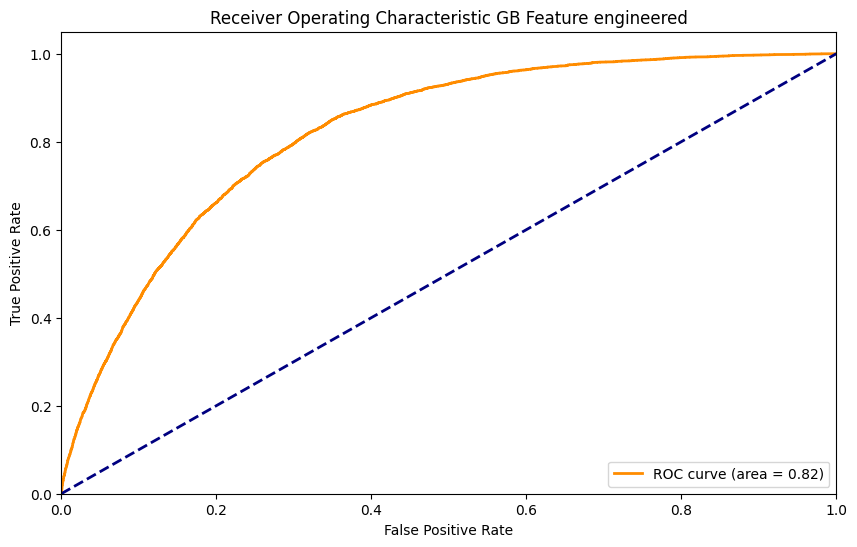

In [54]:
plt.figure(figsize = (10,6))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic GB Feature engineered')
plt.legend(loc="lower right")
plt.show()

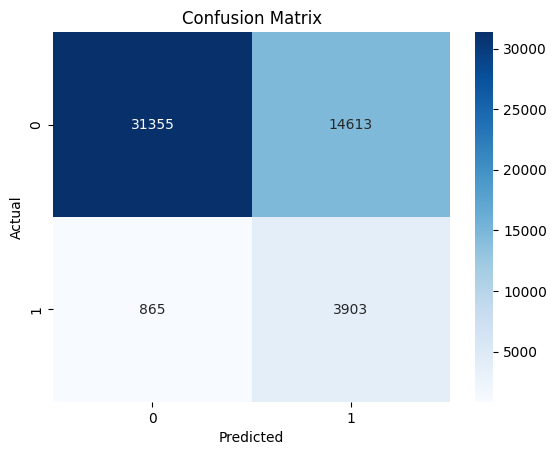

In [55]:
sns.heatmap(confusion_matrix(y_test, optimal_threshold_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

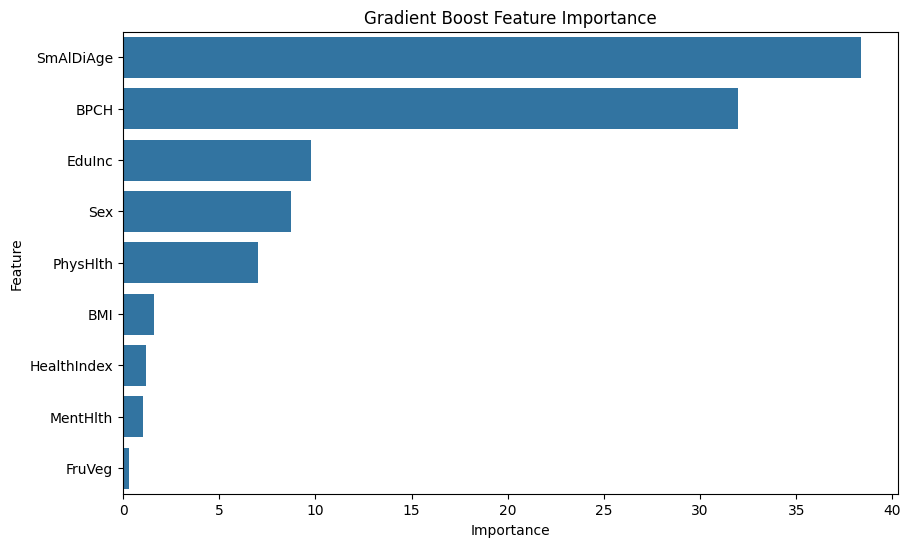

In [58]:
feature_importance = gb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : feature_importance*100})
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10,6))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df)
plt.title('Gradient Boost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##Rejected Models

### XGB

In [ ]:
# from scipy.stats import randint, uniform

# """ XGradient with df"""

# # X_train_res = X2_train_res.copy()
# # y_train_res = y2_train_res.copy()
# # X_test = X2_test.copy()
# # y_test = y2_test.copy()


# param_dist = {'n_estimator' : randint(100,300),
#               'learning_rate' : uniform(0.1),
#               'max_depth' : randint(6,9),
#               'Objective': ['reg:logistic'],
#               'sub_sample': uniform(0.8, 0.2),
#               'colsample_bytree' : [0.5, 1],
#               'colsample_bylevel' :[0.5,1],
#               'reg_alpha' : [0,1],
#               'reg_lambda' : [0,1],
#               'tree_method' : ['hist', 'gpu_hist'],
#               'scale_pos_weight' : [0.9, 2, 50]
# }

# gb_model = XGBClassifier()
# random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=50, cv=3, scoring='roc_auc', verbose=1, random_state=42, n_jobs=-1)
# random_search.fit(X, y)

# best_params = random_search.best_params_
# best_estimator = random_search.best_estimator_
# print("Best Parameters:", best_params)
# print("Best Estimator:", best_estimator)
# print('Best score', random_search.best_score_)

# #print('Dataframe of search cv results', pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score'))

In [ ]:
#  {'Objective': 'reg:logistic', 'colsample_bylevel': 0.5, 'colsample_bytree': 0.5, 'learning_rate': 0.1276167718737047, 'max_depth': 7, 'n_estimator': 165, 'reg_alpha': 1, 'reg_lambda': 0, 'scale_pos_weight': 50, 'sub_sample': 0.8071884547593484, 'tree_method': 'hist'}

Accuracy: 0.4253587196467991
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.37      0.54     45968
           1       0.14      0.97      0.24      4768

    accuracy                           0.43     50736
   macro avg       0.56      0.67      0.39     50736
weighted avg       0.91      0.43      0.51     50736

Confusion matrix: 
 [[16969 28999]
 [  156  4612]]
Optimal threshold 0.82802063
New Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.68      0.80     45968
           1       0.21      0.81      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.57     50736
weighted avg       0.90      0.69      0.76     50736

New Confusion Matrix:
 [[31292 14676]
 [  885  3883]]
AUC Score (XGB) on Probabilities: 0.818


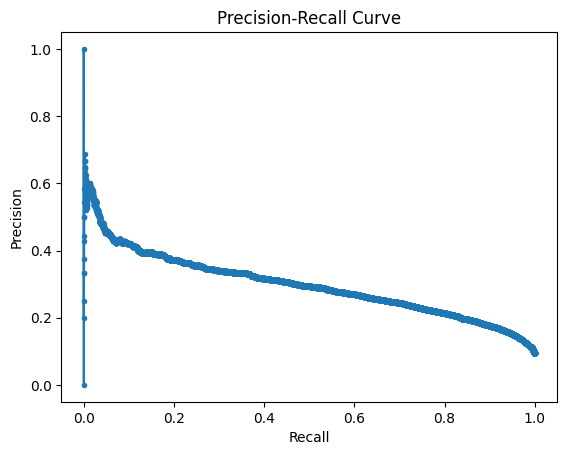

In [ ]:
# xgb = XGBClassifier(Objective='reg:logistic', colsample_bylevel=0.5,
#                     colsample_bytree=0.5, max_depth=7,
#                     learning_rate=0.1276167718737047, n_estimator=165,
#                     reg_alpha = 1, reg_lambda = 0, scale_pos_weight = 50,
#                     sub_sample = 0.8071884547593484, tree_method = 'hist')
# xgb.fit(X_train, y_train)

# y_pred = xgb.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

# # cv = cross_val_score(xgb, X,y, cv = 10, scoring = 'roc_auc')
# # print('CV mean', round(cv.mean(), 3))
# # print('CV std',round(cv.std(),3))

# probabilites = xgb.predict_proba(X_test)[:, 1] # probability score for each sample for class_1

# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (XGB) on Probabilities: {round(roc_auc, 3)}')


# # Optional: Precision-Recall Curve (for imbalanced datasets)
# precision, recall, thresholds_pr = precision_recall_curve(y_test, probabilites)
# plt.plot(recall, precision, marker='.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.26      0.42     45968
           1       0.12      0.98      0.22      4768

    accuracy                           0.33     50736
   macro avg       0.56      0.62      0.32     50736
weighted avg       0.91      0.33      0.40     50736

Confusion matrix: 
 [[12179 33789]
 [   86  4682]]
CV mean 0.817
CV std 0.005
Optimal threshold 0.91164863
New Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.69      0.81     45968
           1       0.21      0.79      0.33      4768

    accuracy                           0.70     50736
   macro avg       0.59      0.74      0.57     50736
weighted avg       0.90      0.70      0.76     50736

New Confusion Matrix:
 [[31915 14053]
 [  984  3784]]
AUC Score (XGB) on Probabilities: 0.813


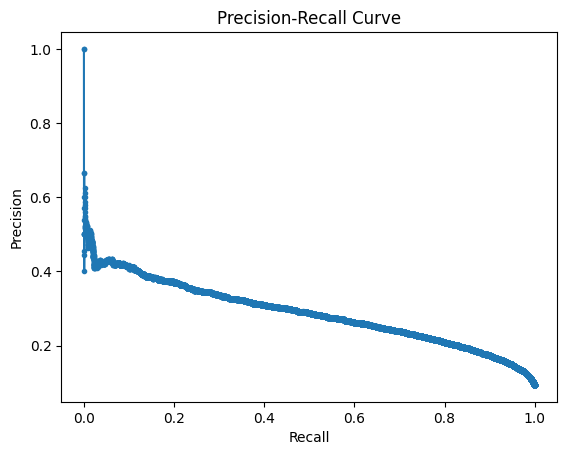

In [ ]:
# #Oversampled data
# xgb.fit(X_train_res, y_train_res)

# y_pred = xgb.predict(X_test)
# print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
# print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

# cv = cross_val_score(xgb, X,y, cv = 10, scoring = 'roc_auc')
# print('CV mean', round(cv.mean(), 3))
# print('CV std',round(cv.std(),3))


# probabilites = xgb.predict_proba(X_test)[:, 1] # probability score for each sample for class_1

# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (XGB) on Probabilities: {round(roc_auc, 3)}')


# # Optional: Precision-Recall Curve (for imbalanced datasets)
# precision, recall, thresholds_pr = precision_recall_curve(y_test,probabilites)
# plt.plot(recall, precision, marker='.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.show()

Classification report               precision    recall  f1-score   support

           0       0.92      0.97      0.94     45968
           1       0.38      0.15      0.22      4768

    accuracy                           0.90     50736
   macro avg       0.65      0.56      0.58     50736
weighted avg       0.87      0.90      0.88     50736

Confusion matrix [[44798  1170]
 [ 4049   719]]
Optimal threshold 0.11545342865161769
New Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.65      0.78     45968
           1       0.20      0.84      0.32      4768

    accuracy                           0.66     50736
   macro avg       0.59      0.74      0.55     50736
weighted avg       0.90      0.66      0.73     50736

New Confusion Matrix:
 [[29653 16315]
 [  743  4025]]
AUC Score (XGB) on Probabilities: 0.815


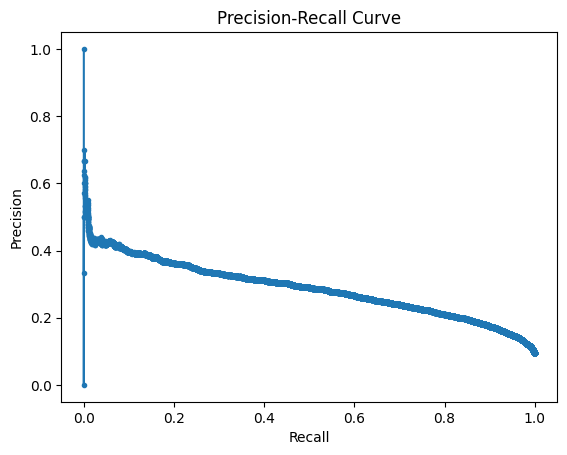

In [ ]:
# """
# OverSampled Data

# """

# gb.fit(X_train_res, y_train_res)

# y_pred = gb.predict(X_test)

# print(f'Classification report', classification_report(y_test, y_pred))
# print(f'Confusion matrix', confusion_matrix(y_test, y_pred))

# # cv = cross_val_score(gb, X,y, cv = 10, scoring = 'roc_auc')
# # print('CV mean',cv.mean())
# # print('CV std',cv.std())

# probabilites = gb.predict_proba(X_test)[:,1] # probability score for each sample for class_1

# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (XGB) on Probabilities: {round(roc_auc, 3)}')


# precision, recall, thresholds_pr = precision_recall_curve(y_test, probabilites)
# plt.plot(recall, precision, marker='.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.show()

###logistic regression

In [ ]:
# lr = LogisticRegression()

# param_dist ={ 'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
#               'C' :[0.05, 0.1, 1, 10, 100],
#               'fit_intercept': [True, False],
#               'class_weight': ['balanced', None]
# }
# random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=50, cv=3, scoring='roc_auc', verbose=1, random_state=42, n_jobs=-1)

# random_search.fit(X,y)

# best_params = random_search.best_params_
# best_estimator = random_search.best_estimator_
# print("Best Parameters:", best_params)
# print("Best Estimator:", best_estimator)
# print('Best score', random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'liblinear', 'fit_intercept': True, 'class_weight': 'balanced', 'C': 1}
Best Estimator: LogisticRegression(C=1, class_weight='balanced', solver='liblinear')
Best score 0.8143797788445043


In [ ]:

# lr = LogisticRegression(C=1, class_weight='balanced', solver='liblinear',fit_intercept = True )

# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)

# print(f'Classification report \n', classification_report(y_test, y_pred))
# print(f'Confusion matrix \n', confusion_matrix(y_test, y_pred))

# cv = cross_val_score(lr, X,y, cv = 10, scoring = 'roc_auc')
# print('CV mean',round(cv.mean(),3))
# print('CV std',round(cv.std(),3))

# probabilites = lr.predict_proba(X_test)[:, 1] # probability score for each sample for class_1

# fpr, tpr, thresholds = roc_curve(y_test, probabilites)
# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]

# print('Optimal threshold', optimal_threshold)


# optimal_threshold_y_pred = (probabilites >= optimal_threshold).astype(int)

# roc_auc = roc_auc_score(y_test, probabilites) #AUC based on probability scores

# # Evaluation with the new threshold
# print(f'New Classification Report:\n {classification_report(y_test, optimal_threshold_y_pred)}')
# print(f'New Confusion Matrix:\n {confusion_matrix(y_test, optimal_threshold_y_pred)}')
# print(f'AUC Score (Logistic Regression) on Probabilities: {round(roc_auc, 3)}')

Classification report 
               precision    recall  f1-score   support

           0       0.97      0.70      0.82     45968
           1       0.22      0.78      0.34      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.74      0.58     50736
weighted avg       0.90      0.71      0.77     50736

Confusion matrix 
 [[32347 13621]
 [ 1032  3736]]
CV mean 0.815
CV std 0.005
Optimal threshold 0.4588116636163568
New Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.67      0.79     45968
           1       0.20      0.83      0.33      4768

    accuracy                           0.68     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.68      0.75     50736

New Confusion Matrix:
 [[30636 15332]
 [  825  3943]]
AUC Score (Logistic Regression) on Probabilities: 0.816


In [ ]:
#class_weight = balanced so no need to train ovesampled data

### SVC model

In [ ]:
# from sklearn.svm import SVC

# svm = SVC()

# param_dist = {'C': [0.1, 1, 10],
#               'kernel': ['poly', 'rbf'],
#               'degree': [2, 3,],
#               'class_weight' : [{1:6}, {1:2}]}

# random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=36, cv=3, scoring='roc_auc', verbose=1, random_state=42, n_jobs=-1)

# random_search.fit(X,y)

# best_params = random_search.best_params_
# best_estimator = random_search.best_estimator_
# print("Best Parameters:", best_params)
# print("Best Estimator:", best_estimator)
# print('Best score', random_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:


# svm = SVC(max_iter = 4500, probability = True, class_weight = {1:9} )
# #SVC(C = 1, kernel = 'poly', degree = 3,gamma = 'scale', class_weight = 'balanced', max_iter = 100, tol = 0.05, verbose = 1, probability= True)
# svm.fit(X_train, y_train)

# y_pred = svm.predict(X_test)
# probabilites = svm.predict_proba(X_test)[:, 1] # probability score for each sample for class_1

# print(f'Classification report \n', classification_report(y_test, y_pred))
# print(f'Confusion matrix \n', confusion_matrix(y_test, y_pred))

# # cv = cross_val_score(svm, X,y, cv = 10, scoring = 'roc_auc')
# # print('CV mean',round(cv.mean(),3))
# # print('CV std',round(cv.std(),3))

# fpr, tpr, thresholds = roc_curve(y_test, probabilites)

# j_statistic = tpr - fpr  # Calculate Youden’s J statistic
# optimal_idx = j_statistic.argmax()  # Get the index of the maximum J value
# optimal_threshold = thresholds[optimal_idx]
# print('Optimal threshold', round(optimal_threshold,3))

# y_pred_optimal_threshold = (probabilites >= optimal_threshold).astype(int)

# print(f"Classification report new \n {classification_report(y_test, y_pred_optimal_threshold)}")
# print(f" Confusion matrix \n {confusion_matrix(y_test, y_pred_optimal_threshold)}")
# roc_auc_score = roc_auc_score(y_test, probabilites)
# print('AUC score SVM optimal threshold', round(roc_auc_score,3))

Classification report 
               precision    recall  f1-score   support

           0       0.88      0.13      0.23     45968
           1       0.09      0.82      0.16      4768

    accuracy                           0.20     50736
   macro avg       0.48      0.48      0.20     50736
weighted avg       0.80      0.20      0.22     50736

Confusion matrix 
 [[ 6101 39867]
 [  840  3928]]
AUC scor 0.478276966855554
Optimal threshold inf
Classification report new 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     45968
           1       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736

 Confusion matrix 
 [[45968     0]
 [ 4768     0]]
AUC score SVM optimal threshold 0.5


#Best Model according to AUC
###Gradient Boosting classifier with Feature engineering without Oversampling


Classification report
               
               precision    recall  f1-score   support
           0       0.91      1.00      0.95     45968
           1       0.61      0.00      0.01      4768

    accuracy                           0.91     50736
    macro avg       0.76      0.50     0.48     50736
    weighted avg    0.88      0.91     0.86     50736

Confusion matrix

[45959     9]

[ 4754    14]

Cross_val mean AUC score 0.818

Cross_val std AUC score 0.005

___

Optimal threshold 0.09


> New Classification Report with Optimised Threshold:
               
               precision    recall  f1-score   support
           0       0.97      0.67      0.80     45968
           1       0.21      0.82      0.33      4768

    accuracy                           0.69     50736
    macro avg       0.59      0.75     0.56     50736
    weighted avg    0.90      0.69     0.75     50736


> New Confusion Matrix with Optimised Threshold:

 [30927 15041]

 [  838  3930]

 AUC Score (GB): 0.819


#Pipeline

Selected model Gradient Booster feature engineered not oversampled

Optimal Threshold: 0.08779397571404894

Classification Report
               precision    recall  f1-score   support

         0.0       0.97      0.67      0.80     45968
         1.0       0.21      0.83      0.33      4768

    accuracy                           0.69     50736
   macro avg       0.59      0.75      0.56     50736
weighted avg       0.90      0.69      0.75     50736


Confusion Matrix
 [[30954 15014]
 [  833  3935]]

AUC Score: 0.821


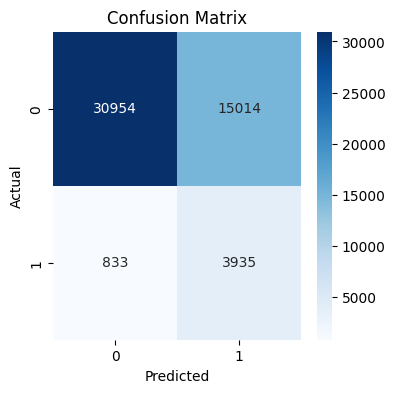

In [6]:
dfp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science projects /Capstone Heart disease/HeartDisease.csv')

# Identify numeric and categorical columns
def data_preprocess(dfp):

  convert_to_int = dfp.columns.tolist()
  for col in convert_to_int:
      dfp[col] = dfp[col].astype(int)

  dfp['PhysHlth'] = dfp['PhysHlth'].apply(lambda x: random.randint(1, 30) if x == 0 else x)
  dfp['MentHlth'] = dfp['MentHlth'].apply(lambda x: random.randint(1, 30) if x == 0 else x)

  dfp['HealthIndex'] = round((dfp['PhysHlth'] + dfp['MentHlth'] + dfp['PhysActivity']) / 3, 2)

  dfp['BMI'] = dfp['BMI'] ** 2
  dfp['BPCH'] = (dfp['HighBP'] + dfp['HighChol'] ) / 2
  dfp['FruVeg'] = ( dfp['Fruits'] + dfp['Veggies']) / 2
  dfp['EduInc'] = ( dfp['Education'] + dfp['Income'] ) / 2
  dfp['SmAlDiAge'] = ( dfp['Smoker'] + dfp['HvyAlcoholConsump'] + dfp['Diabetes'] + dfp['Age'] )/4
  dfp.drop(['PhysActivity', 'HighBP', 'HighChol', 'Fruits', 'Veggies', 'Education', 'Income', 'Smoker', 'HvyAlcoholConsump', 'Diabetes', 'Age'], axis = 1, inplace  = True)

  return dfp



# Define the pipeline
pipeline = Pipeline(steps=[

    ('classifier', GradientBoostingClassifier(
        learning_rate=0.10005629167085328,
        loss='exponential', max_depth=5, max_features='log2',
        min_samples_split=3, n_estimators=187,
        n_iter_no_change=8, subsample=0.9877105418031501,
        validation_fraction=0.10015575316820287
    ))
])


# Split the data
X = data_preprocess(dfp.drop(columns=['HeartDiseaseorAttack'], axis=1)) # Apply preprocessing to X
y = dfp['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Get predicted probabilities and find the optimal threshold
probabilities = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
j_statistic = tpr - fpr
optimal_idx = j_statistic.argmax()
optimal_threshold = thresholds[optimal_idx]

print('Optimal Threshold:', optimal_threshold)


# Define custom prediction function
def custom_predict(pipeline, X, threshold=optimal_threshold):
    global probabilities
    probabilities = pipeline.predict_proba(X)[:, 1]
    return (probabilities >= threshold).astype(int)

# Make predictions using the custom prediction function
y_pred = custom_predict(pipeline, X_test)

# Evaluate the model
print('\nClassification Report\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, y_pred))
print('\nAUC Score:', round(roc_auc_score(y_test, probabilities), 3))

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Save the trained pipeline
joblib.dump(pipeline, 'heart_disease_pipeline.joblib')

# Load the trained pipeline and make predictions on new data
loaded_pipeline = joblib.load('heart_disease_pipeline.joblib')

In [5]:
# Prepare new data for prediction
new_data = pd.DataFrame({
    'BMI': [25.0],
    'HighBP': [1],
    'HighChol': [0],
    'Smoker': [0],
    'Diabetes': [0],
    'PhysActivity': [1],
    'Fruits': [1],
    'Veggies': [1],
    'HvyAlcoholConsump': [0],
    'MentHlth': [10],
    'PhysHlth': [5],
    'Sex': [0],
    'Age': [2],  # e.g., '25-29'
    'Education': [3],
    'Income': [4]
})

# Predict using the loaded pipeline

new_data_processed = data_preprocess(new_data)

prediction = custom_predict(loaded_pipeline, new_data_processed)
print(f'\nPredicted Heart Disease: {prediction[0]}')


Predicted Heart Disease: 0
